In [49]:
#!pip install --upgrade pingouin
#!pip install opencv-python

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
from PIL import Image
import pingouin as pg
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import jarque_bera
import cv2
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import datetime

In [51]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [52]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')

In [53]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count', 'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "vader_sentiment_analysis_polarity_5_cat",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_polarity_5_cat",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_polarity_5_cat",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_polarity_5_cat",
                         "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                         "liwc_sentiment_analysis_polarity_5_cat",
                         "final_score", "final_polarity", 'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [55]:
count = 1
all_tweets = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_pd(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang', "id_user",
                             #"vader_sentiment_analysis_score", 
                             "vader_sentiment_analysis_polarity",
                             "vader_sentiment_analysis_polarity_5_cat",
                             #"oplexicon_sentiment_analysis_score",
                             "oplexicon_sentiment_analysis_polarity",
                             "oplexicon_sentiment_analysis_polarity_5_cat",
                             #"sentistrength_sentiment_analysis_score",
                             "sentistrength_sentiment_analysis_polarity",
                             "sentistrength_sentiment_analysis_polarity_5_cat",
                             #"sentilexpt_sentiment_analysis_score",
                             "sentilexpt_sentiment_analysis_polarity",
                             "sentilexpt_sentiment_analysis_polarity_5_cat",
                             #"liwc_sentiment_analysis_score",
                             "liwc_sentiment_analysis_polarity",
                             "liwc_sentiment_analysis_polarity_5_cat",
                             'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        tweets['Participant'] = count
        if all_tweets.empty:
            all_tweets = tweets
        else:
            all_tweets = all_tweets.append(tweets)
        
        count += 1
    
# print(all_tweets)
#sns.relplot(x="created_at", y="final_score", hue="final_polarity", row="id_user",kind="line", data=all_tweets);

In [56]:
all_tweets.head()

created_at  vader_sentiment_analysis_score  \
0  2021-03-31T19:13:28                         -0.4588   
1  2021-03-31T12:28:56                          0.0000   
2  2021-03-31T12:17:06                          0.7734   
3  2021-03-31T11:46:04                         -0.8720   
4  2021-03-30T17:58:24                         -0.6808   

   oplexicon_sentiment_analysis_score  sentistrength_sentiment_analysis_score  \
0                            0.000000                                    0.00   
1                            0.000000                                    0.00   
2                            0.458831                                    0.00   
3                            0.458831                                    0.25   
4                            0.000000                                    0.00   

   sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                 0.00                         0.0000   
1                                 0.00                        -0.0667   
2                                 0.00                         0.0196   
3                                -0.25                         0.0400   
4                                -0.25                         0.0000   

   final_score final_polarity  Participant  
0    -0.091760            neg            1  
1    -0.013340            neg            1  
2     0.250366            pos            1  
3    -0.074634            neg            1  
4    -0.186160            neg            1

In [57]:
for i in all_tweets.index:
    t = all_tweets.iloc[i]
    d = pd.to_datetime(t['created_at']).to_pydatetime()
    date_from = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 9)
    date_to = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 18)
    if date_from <= d <= date_to:
        all_tweets.at[i,'is_work_time'] = int(1)
    else:
        all_tweets.at[i,'is_work_time'] = int(0)

In [58]:
print(all_tweets['is_work_time'].value_counts())

1.0    52025
0.0    39607
Name: is_work_time, dtype: int64


In [59]:
def create_line_plot(tweets, id_user, count):
    fig, ax = plt.subplots(figsize=(30, 12))

    tweets["created_at"] = pd.to_datetime(tweets["created_at"])
    tweets['date_minus_time'] = tweets["created_at"].apply(lambda tweets : datetime.datetime(year=tweets.year, month=tweets.month, day=tweets.day))
    tweets.set_index(tweets["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(tweets['final_score'].resample('D').mean())

    x = new_df.index
    y = new_df['final_score']

    ran = range(0, len(x), 15)

    x_ticks = new_df.index[ran]

    plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=18)
    plt.xticks(x_ticks, rotation='vertical', fontsize=18)

    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel('Polarity Score', fontsize=16)

    plt.title("Tweets polarity per day - Participant {} - User {}".format(count, id_user), fontsize=30, pad = 20)
    plt.ylabel("Polarity", fontsize=26, labelpad = 10)
    plt.xlabel("Days", fontsize=26, labelpad = 10)

    # plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    # min_ylim, max_ylim = plt.ylim()
    # plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.margins(x=0.02)
    plt.tight_layout()
    plt.plot(x,y)

In [60]:
all_tweets.head()

created_at  vader_sentiment_analysis_score  \
0  2021-03-31T19:13:28                         -0.4588   
1  2021-03-31T12:28:56                          0.0000   
2  2021-03-31T12:17:06                          0.7734   
3  2021-03-31T11:46:04                         -0.8720   
4  2021-03-30T17:58:24                         -0.6808   

   oplexicon_sentiment_analysis_score  sentistrength_sentiment_analysis_score  \
0                            0.000000                                    0.00   
1                            0.000000                                    0.00   
2                            0.458831                                    0.00   
3                            0.458831                                    0.25   
4                            0.000000                                    0.00   

   sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                 0.00                         0.0000   
1                                 0.00                        -0.0667   
2                                 0.00                         0.0196   
3                                -0.25                         0.0400   
4                                -0.25                         0.0000   

   final_score final_polarity  Participant  is_work_time  
0    -0.091760            neg            1           0.0  
1    -0.013340            neg            1           1.0  
2     0.250366            pos            1           1.0  
3    -0.074634            neg            1           1.0  
4    -0.186160            neg            1           1.0

In [61]:
def update_final_score_by_ensemble(list_ensemble):
    scores = []
    for i in all_tweets.index:
        t = all_tweets.iloc[i]
        for e in list_ensemble:
            scores.append(t['{}_sentiment_analysis_score'.format(e)])
        mean = sum(scores) / len(scores)
        scores.clear()
        all_tweets.at[i,'final_score'] = mean

In [62]:
def update_final_polarities():
    for i in all_tweets.index:
        f_pol = ''
        t = all_tweets.iloc[i]
        s = t['final_score']
        
        if s > 0.0:
            f_pol = 'pos'
        elif s < 0.0:
            f_pol = 'neg'
        else:
            f_pol = 'neu'

        all_tweets.at[i,'final_polarity'] = f_pol

In [63]:
ensembles = ['sentistrength', 'sentilexpt']
update_final_score_by_ensemble(ensembles)
update_final_polarities()

In [64]:
all_tweets.head()

created_at  vader_sentiment_analysis_score  \
0  2021-03-31T19:13:28                         -0.4588   
1  2021-03-31T12:28:56                          0.0000   
2  2021-03-31T12:17:06                          0.7734   
3  2021-03-31T11:46:04                         -0.8720   
4  2021-03-30T17:58:24                         -0.6808   

   oplexicon_sentiment_analysis_score  sentistrength_sentiment_analysis_score  \
0                            0.000000                                    0.00   
1                            0.000000                                    0.00   
2                            0.458831                                    0.00   
3                            0.458831                                    0.25   
4                            0.000000                                    0.00   

   sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                 0.00                         0.0000   
1                                 0.00                        -0.0667   
2                                 0.00                         0.0196   
3                                -0.25                         0.0400   
4                                -0.25                         0.0000   

   final_score final_polarity  Participant  is_work_time  
0        0.000            neu            1           0.0  
1        0.000            neu            1           1.0  
2        0.000            neu            1           1.0  
3        0.000            neu            1           1.0  
4       -0.125            neg            1           1.0

In [21]:
tweets = create_tweets_pd(data, 26)
columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang', "id_user",
                     "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                     "vader_sentiment_analysis_polarity_5_cat",
                    "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                     "oplexicon_sentiment_analysis_polarity_5_cat",
                    "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                     "sentistrength_sentiment_analysis_polarity_5_cat",
                    "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                     "sentilexpt_sentiment_analysis_polarity_5_cat",
                     "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                     "liwc_sentiment_analysis_polarity_5_cat",
                    'text_updated', 'is_retweet', 'retweet_updated']

for c in columns_to_delete:
    del tweets[c]
    
tweets.head()

created_at  final_score final_polarity
0  2021-03-31T19:13:28    -0.091760            neg
1  2021-03-31T12:28:56    -0.013340            neg
2  2021-03-31T12:17:06     0.250366            pos
3  2021-03-31T11:46:04    -0.074634            neg
4  2021-03-30T17:58:24    -0.186160            neg

In [65]:
all_tweets

created_at  vader_sentiment_analysis_score  \
0     2021-03-31T19:13:28                         -0.4588   
1     2021-03-31T12:28:56                          0.0000   
2     2021-03-31T12:17:06                          0.7734   
3     2021-03-31T11:46:04                         -0.8720   
4     2021-03-30T17:58:24                         -0.6808   
...                   ...                             ...   
4923  2020-08-17T19:09:02                          0.4939   
4924  2020-07-31T19:43:02                          0.3612   
4925  2020-10-08T20:29:24                          0.6114   
4926  2020-12-30T22:22:26                          0.4199   
4927  2021-02-11T18:21:29                          0.3382   

      oplexicon_sentiment_analysis_score  \
0                               0.000000   
1                               0.000000   
2                               0.458831   
3                               0.458831   
4                               0.000000   
...                                  ...   
4923                            0.000000   
4924                            0.000000   
4925                            0.000000   
4926                            0.329000   
4927                            0.454000   

      sentistrength_sentiment_analysis_score  \
0                                      0.000   
1                                      0.000   
2                                      0.000   
3                                      0.250   
4                                      0.000   
...                                      ...   
4923                                   0.250   
4924                                   0.250   
4925                                   0.250   
4926                                   0.329   
4927                                   0.329   

      sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                   0.000                         0.0000   
1                                   0.000                        -0.0667   
2                                   0.000                         0.0196   
3                                  -0.250                         0.0400   
4                                  -0.250                         0.0000   
...                                   ...                            ...   
4923                                0.000                         0.2000   
4924                                0.000                         0.0000   
4925                                0.250                        -0.0625   
4926                                0.329                         0.0000   
4927                                0.204                        -0.0625   

      final_score final_polarity  Participant  is_work_time  
0        0.000000            neu            1           0.0  
1        0.000000            neu            1           1.0  
2        0.000000            neu            1           1.0  
3        0.000000            neu            1           1.0  
4       -0.125000            neg            1           1.0  
...           ...            ...          ...           ...  
4923     0.250000            pos           16           1.0  
4924    -0.354415            neg           16           1.0  
4925     0.000000            neu           16           0.0  
4926     0.000000            neu           16           0.0  
4927    -0.125000            neg           16           1.0  

[91632 rows x 10 columns]

In [164]:
def create_boxplot_chart_data(tweets, is_percent):
    bar_chart_data = []

    count = 1
    df_grouped = tweets.groupby(['Participant'])
    for i in range(1,len(df_grouped)+1):
        t = tweets.query('Participant == {}'.format(i))

        if is_percent == True:
            d = ['P{}'.format(count),
                 (len(t.query("final_polarity == 'pos'")) / len(t)) * 100,
                 (len(t.query("final_polarity == 'neu'")) / len(t)) * 100,
                 (len(t.query("final_polarity == 'neg'")) / len(t)) * 100
                ]
        else:
            d = ['P{}'.format(count), 
                 len(t.query("final_polarity == 'pos'")),
                 len(t.query("final_polarity == 'neu'")), 
                 len(t.query("final_polarity == 'neg'"))]
        bar_chart_data.append(d)
        count += 1

    if is_percent == True:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
    else:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
    return df

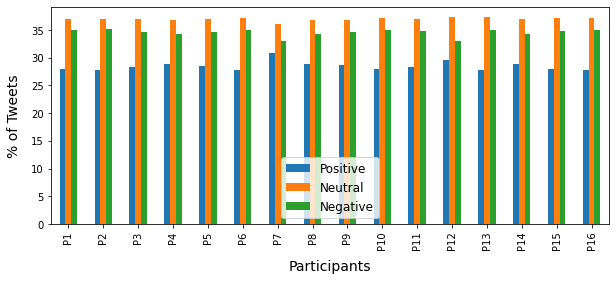

Mean por_pos: 28.488901904227603
Mean por_neu: 36.979266674666015
Mean por_neg: 34.53183142110639


In [113]:
# multiple bar plots

df = create_boxplot_chart_data(all_tweets, True)
# print(df)
# y_range = range(0,6001, 500)
df.plot(x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(10,4))

plt.legend(["Positive", "Neutral", "Negative"], fontsize=12)
# plt.title('Tweets Polarity', fontsize=16, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('% of Tweets', fontsize=14, labelpad=10)
# plt.grid(True)

plt.show()

print('Mean por_pos:',np.mean(df['por_pos']))
print('Mean por_neu:',np.mean(df['por_neu']))
print('Mean por_neg:',np.mean(df['por_neg']))

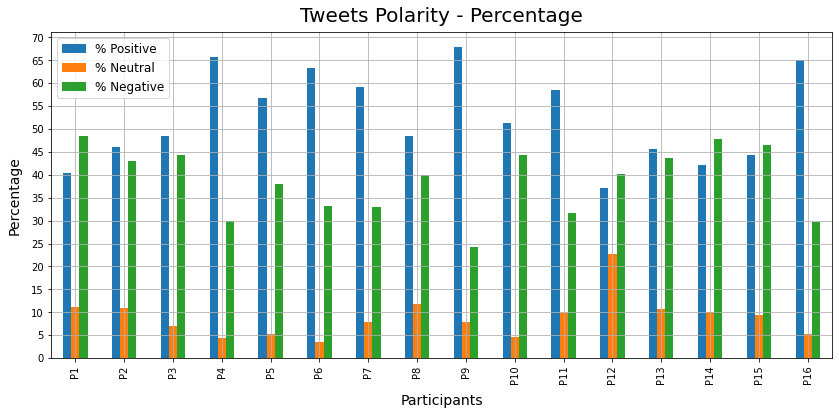

In [13]:
# multiple line plots

df = create_boxplot_chart_data(True)

y_range = range(0, 71, 5)
# df.head()
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,6))


plt.legend(['% Positive', '% Neutral', '% Negative'], fontsize=12)
plt.title('Tweets Polarity - Percentage', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('Percentage', fontsize=14, labelpad=10)
plt.grid(True)

plt.show()

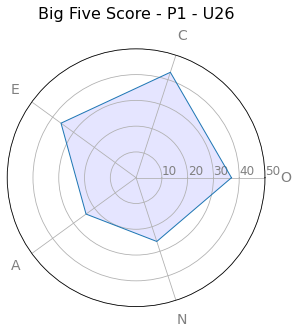

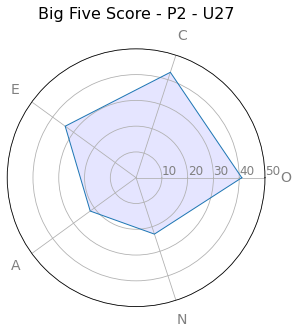

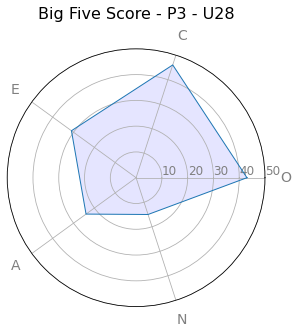

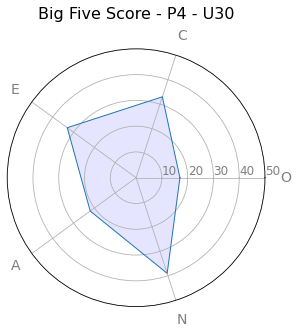

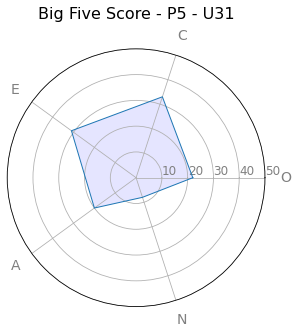

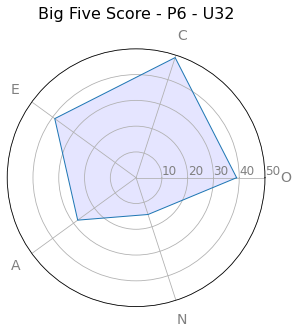

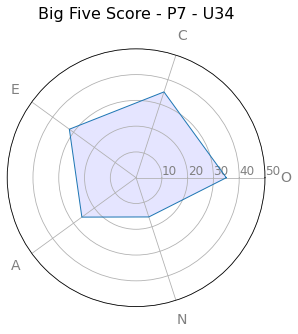

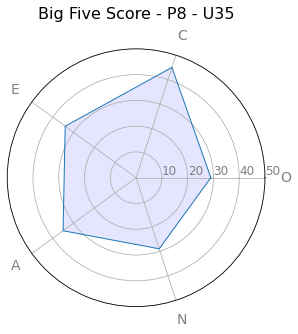

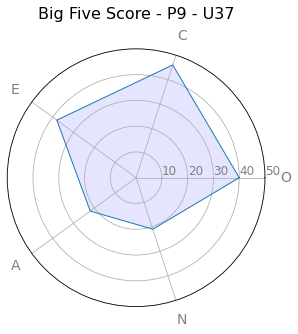

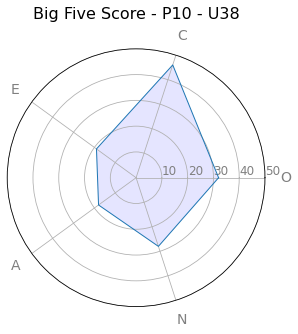

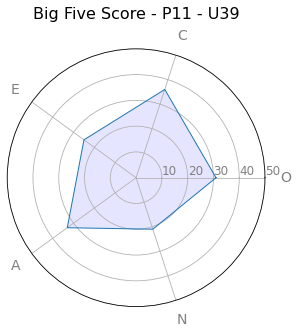

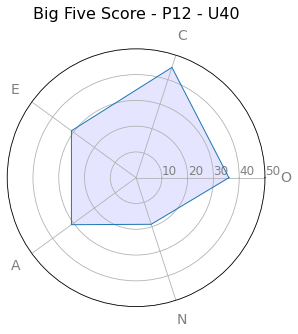

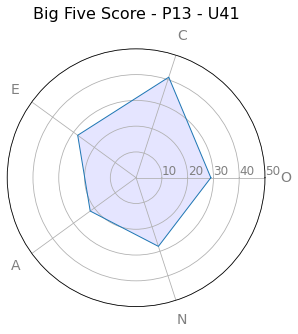

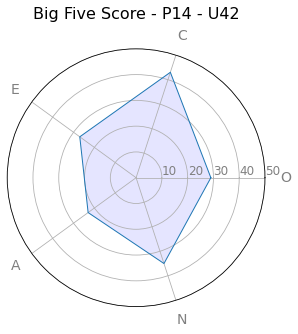

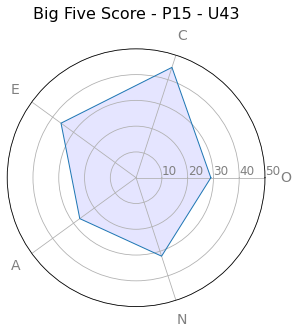

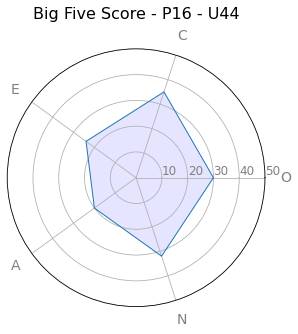

In [14]:
count = 1

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'id_user']
        o = b['O']
        c = b['C']
        e = b['E']
        a = b['A']
        n = b['N']
        
        df = pd.DataFrame({
        'group': ['A'],
        'O': o,
        'C': c,
        'E': e,
        'A': a,
        'N': n
        })
        
        # number of variable
        categories=list(df)[1:]
        N = len(categories)

        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values=df.loc[0].drop('group').values.flatten().tolist()
        values += values[:1]

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]


        fig = plt.figure(figsize=(8, 6))
        gs = GridSpec(nrows=1, ncols=2)

        # Initialise the spider plot
        ax = fig.add_subplot(gs[0, 0])
        ax = plt.subplot(121, polar=True)

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=14)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=12)
        plt.ylim(0,50)
        
        ax.tick_params(pad=10)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

        plt.title('Big Five Score - P{} - U{}'.format(count, d), fontsize=16, pad = 30)

        plt.tight_layout()

#         Show the graph
#         plt.show()
        
        fig.savefig('images/polar_ocean_p{}_u{}.png'.format(count, d), bbox_inches='tight')

        count += 1

In [15]:
def show_images(images, cols = 1, rows = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize = (3,6))
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(rows, cols, n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis('off')
#         a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

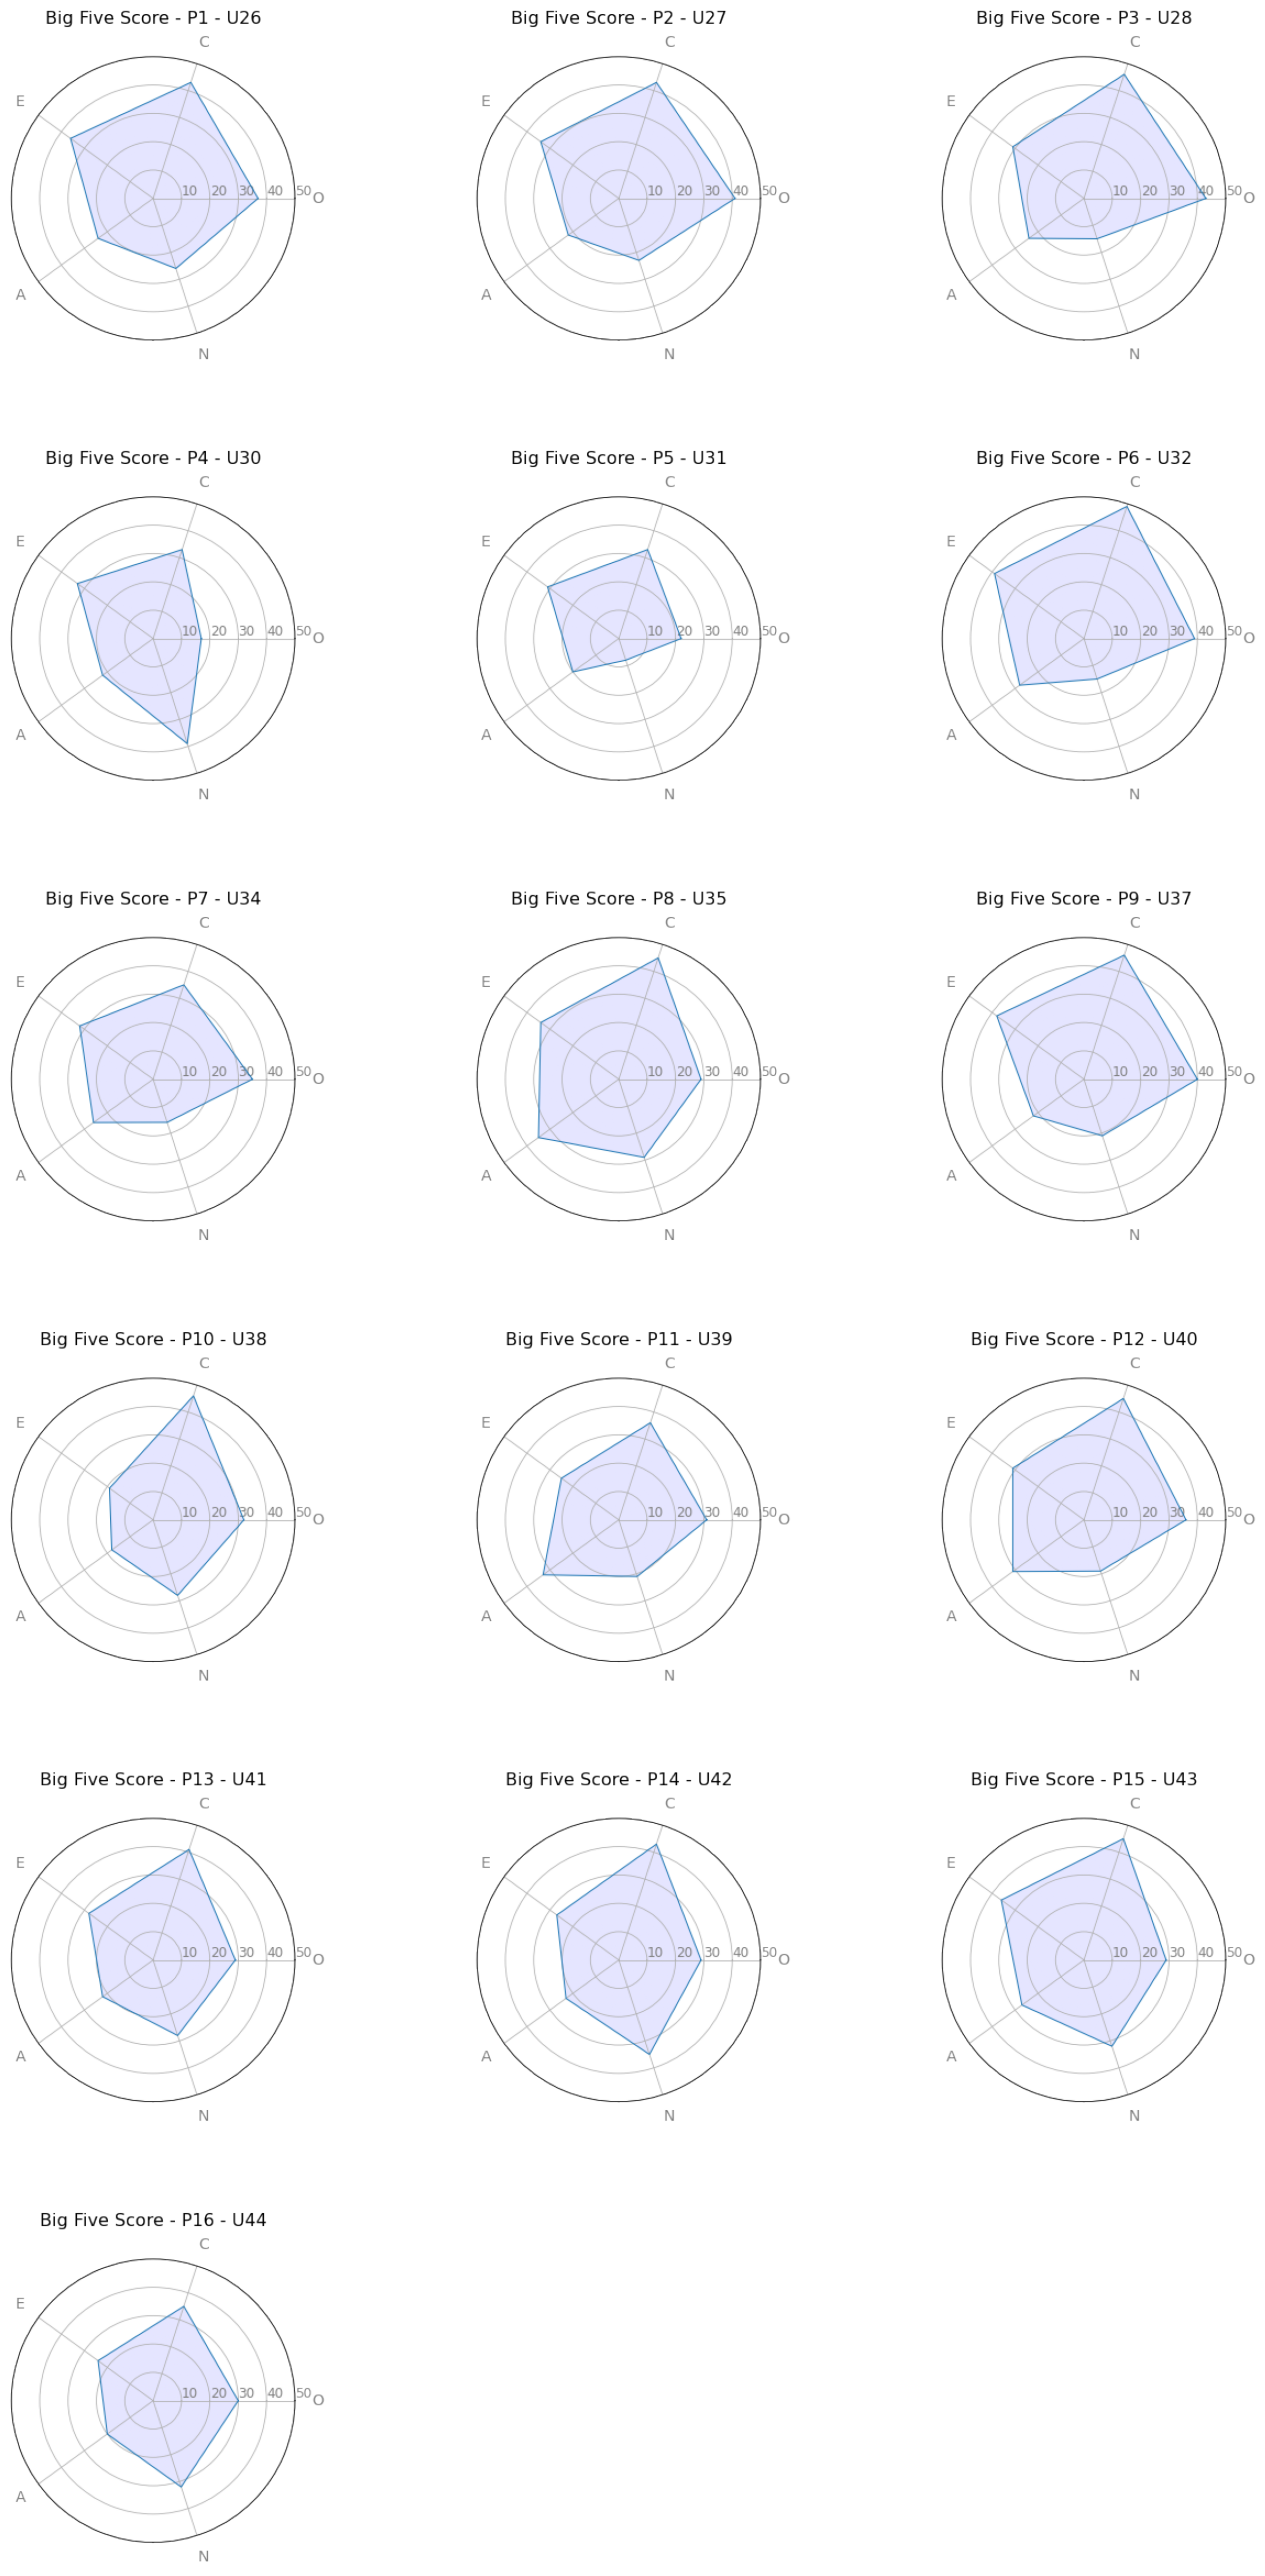

In [16]:
count = 1
images_list = []

for d in data:
    if data[d]['bigfive']:
        image = plt.imread('images/polar_ocean_p{}_u{}.png'.format(count, d))
        images_list.append(image)
        count += 1
        
show_images(np.array(images_list), cols=3, rows=6)

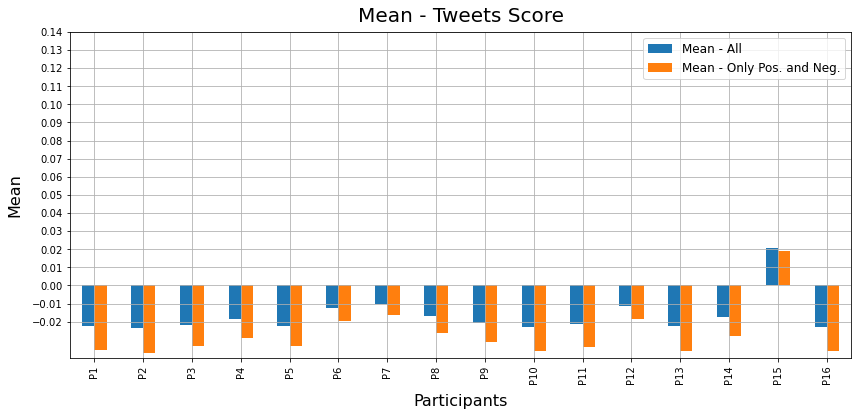

In [114]:
# multiple bar plots with means

bar_chart_data = []

y_range = np.arange(-0.02, 0.15, 0.01) 

count = 1
df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))

    d = ['P{}'.format(count),
         t['final_score'].mean(),
         t.query("final_polarity != 'neu'")['final_score'].mean()
        ]

    bar_chart_data.append(d)
    count += 1

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(yticks = y_range, x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,6))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."], fontsize=12)
plt.title('Mean - Tweets Score', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=16, labelpad=10)
plt.ylabel('Mean', fontsize=16, labelpad=10)
plt.grid(True)

plt.show()

In [125]:
count = 1
json_data = {
    'Participant': [],
    'Id User': [],
    'O': [],
    'C': [],
    'E': [],
    'A': [],
    'N': []
}

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'Id User']
        b['Participant'] = count
        del b['id']
        b = b[['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N']]
        json_data['Participant'].append(b['Participant'][0])
        json_data['Id User'].append(b['Id User'][0])
        json_data['O'].append(b['O'][0])
        json_data['C'].append(b['C'][0])
        json_data['E'].append(b['E'][0])
        json_data['A'].append(b['A'][0])
        json_data['N'].append(b['N'][0])
        count += 1
        
bf = pd.DataFrame(json_data)

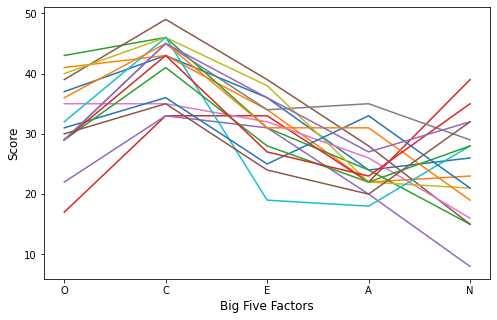

In [19]:
fig = plt.figure(figsize=(8,5))

x = ['O', 'C', 'E', 'A', 'N']
y = [
    bf['O'],
    bf['C'],
    bf['E'],
    bf['A'],
    bf['N'],
]

# plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

# plt.title("Big Five", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Big Five Factors", fontsize=12)

# plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
# min_ylim, max_ylim = plt.ylim()
# plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

plt.plot(x, y)

fig.savefig('images/line_chart_bigfive.png', bbox_inches='tight')

       Participant   Id User          O          C          E          A  \
count    16.000000  16.00000  16.000000  16.000000  16.000000  16.000000   
mean      8.500000  35.43750  32.437500  41.500000  31.125000  24.812500   
std       4.760952   5.92136   6.966288   5.291503   5.414487   4.860984   
min       1.000000  26.00000  17.000000  33.000000  19.000000  18.000000   
25%       4.750000  30.75000  29.000000  35.750000  27.750000  22.000000   
50%       8.500000  36.00000  31.500000  43.000000  31.500000  23.500000   
75%      12.250000  40.25000  37.500000  45.250000  34.500000  27.250000   
max      16.000000  44.00000  43.000000  49.000000  39.000000  35.000000   

               N  
count  16.000000  
mean   24.187500  
std     8.408081  
min     8.000000  
25%    18.250000  
50%    24.500000  
75%    29.750000  
max    39.000000  


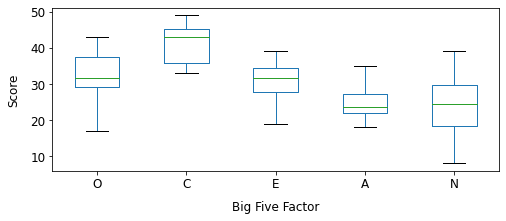

In [20]:
bplot = bf.boxplot(column=['O', 'C', 'E', 'A', 'N'], grid=False, figsize=(8,3))
# y_range = range(0,4501, 500)

# bplot.axes.set_title("Big Five Factor Score", fontsize=14, pad = 10)
 
bplot.set_xlabel("Big Five Factor", fontsize=12, labelpad=10)
bplot.set_ylabel("Score", fontsize=12, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_xticklabels(['O', 'C', 'E', 'A', 'N'])

print(bf.describe())

[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

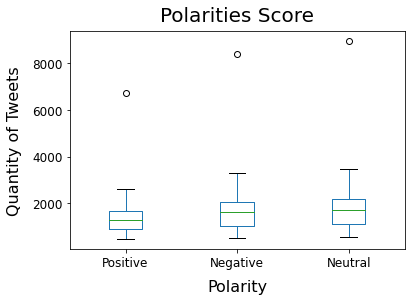

In [115]:
df = create_boxplot_chart_data(all_tweets, False)

bplot = df.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(6,4))
# y_range = range(0,4501, 500)

bplot.axes.set_title("Polarities Score", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

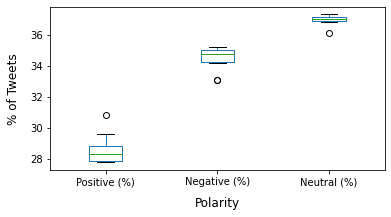

In [117]:
df = create_boxplot_chart_data(all_tweets, True)

bplot = df.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(6,3))
# y_range = range(0, 71, 10)

# bplot.axes.set_title("Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=12, labelpad=10)
bplot.set_ylabel("% of Tweets", fontsize=12, labelpad=10)
# bplot.set_yticks(y_range)
# bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

In [22]:
def create_line_plot(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]

    tickvalues = range(0,len(x))

    fig = plt.figure(figsize=(14,3.5))

    plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

    plt.title("Quantity Tweets per Month - P{} - U{}".format(count, id_user))
    plt.ylabel("Quantity of Tweets", fontsize=12)
    plt.xlabel("Months", fontsize=12)

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [23]:
def create_histogram(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]
    
    fig = plt.figure(figsize=(15,3.5))

    n, bins, patches = plt.hist(y, bins='auto', color='#5643fd')

    plt.xticks(np.arange(0, 1000, 50))

    plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))

    plt.title('Tweets Frequency per Month - P{} - U{}'.format(count, id_user))
    plt.xlabel('Quantity of Tweets')
    plt.ylabel('Frequency')

    plt.show()

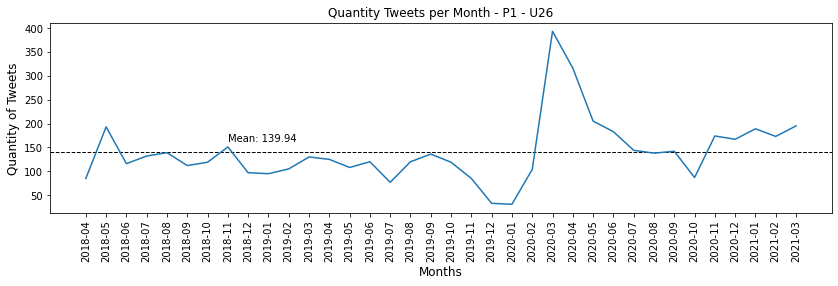

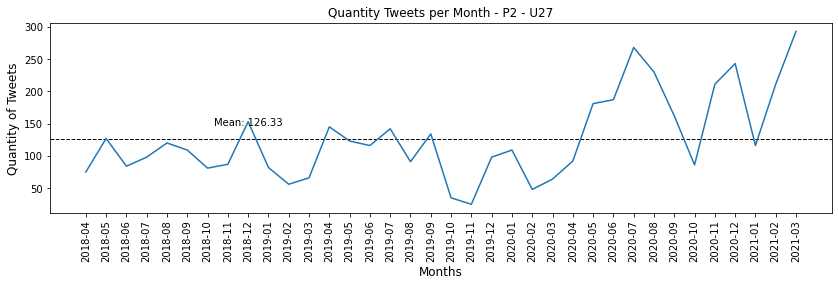

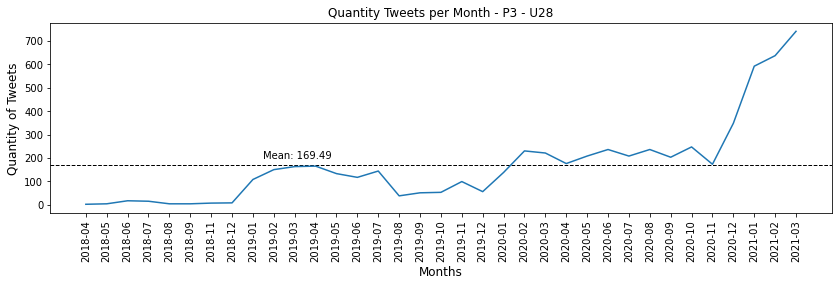

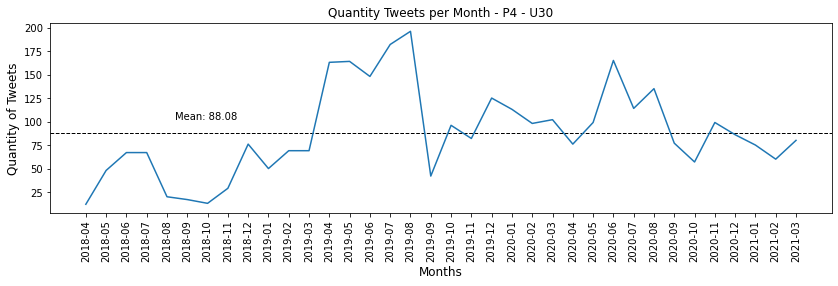

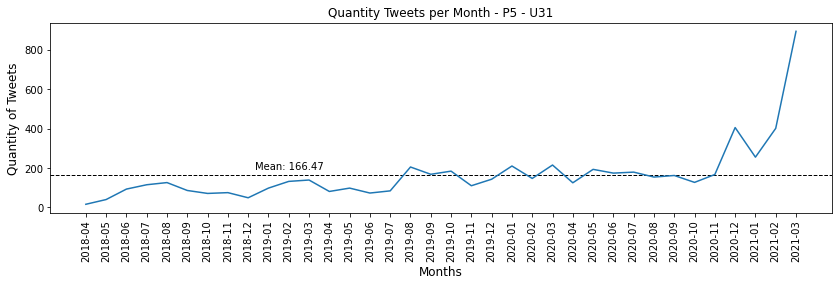

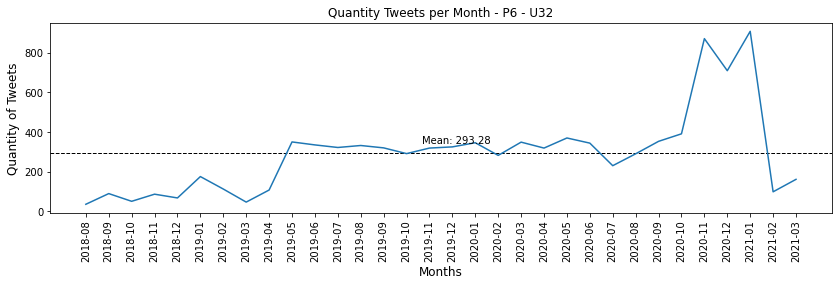

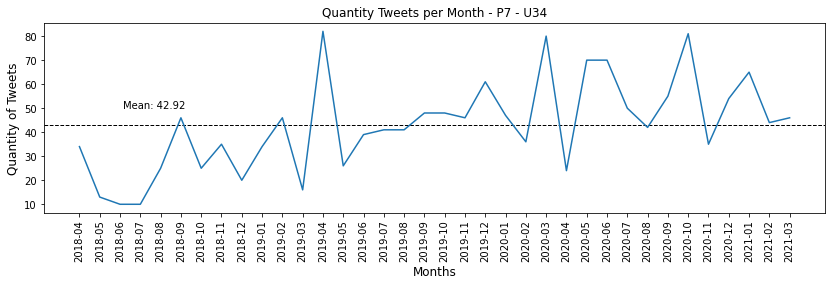

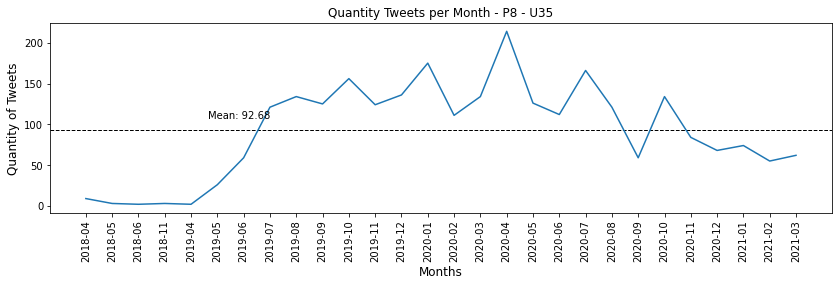

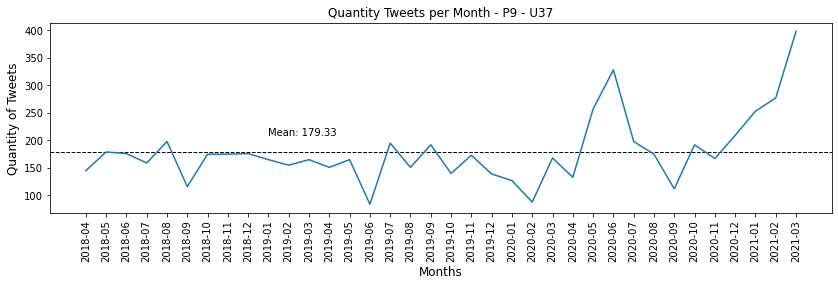

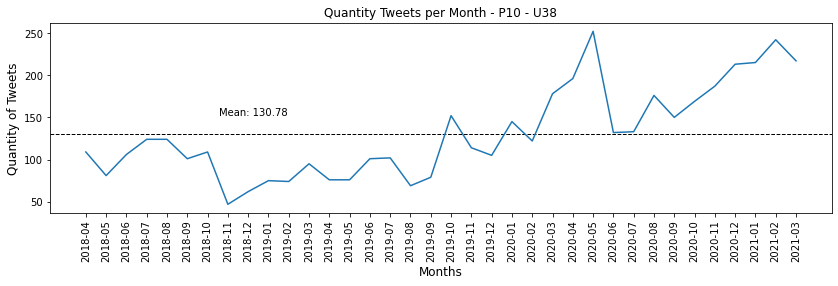

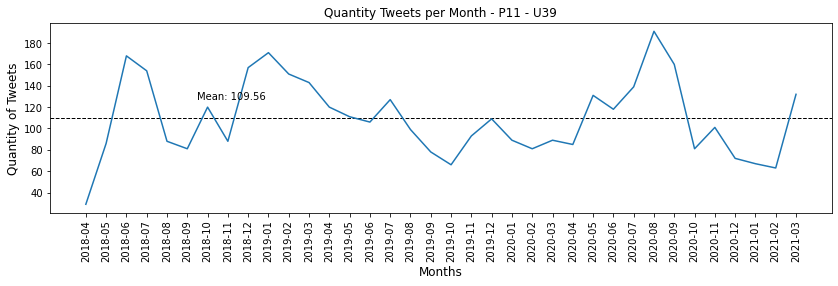

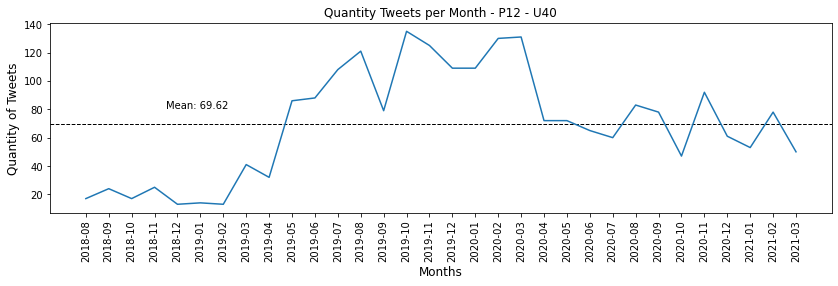

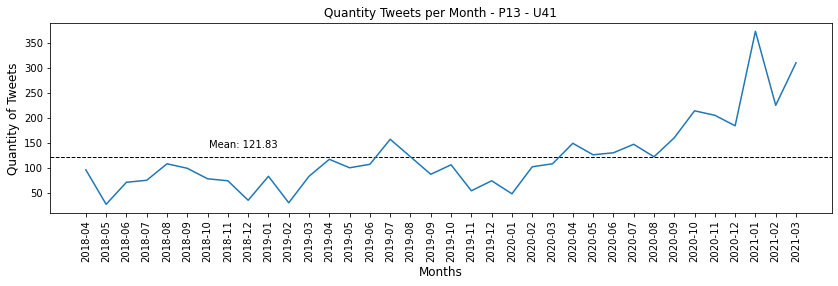

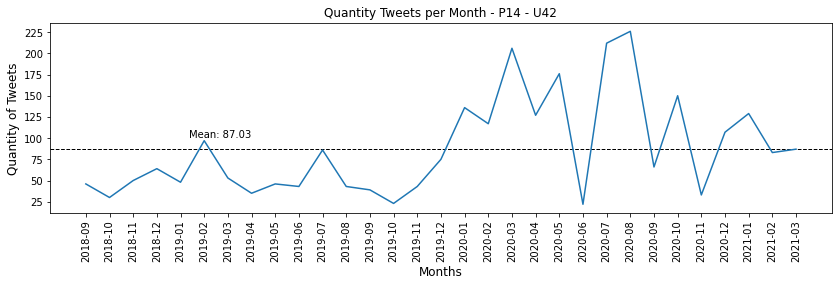

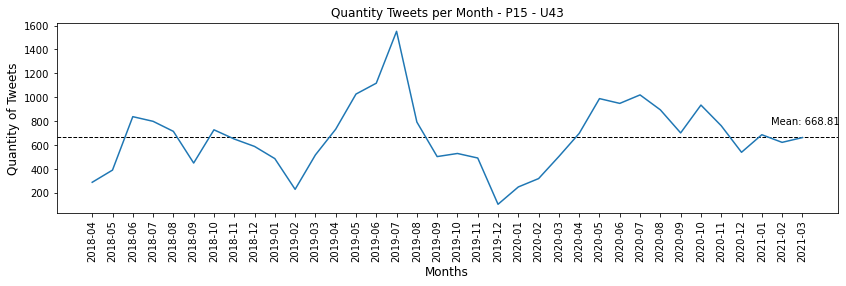

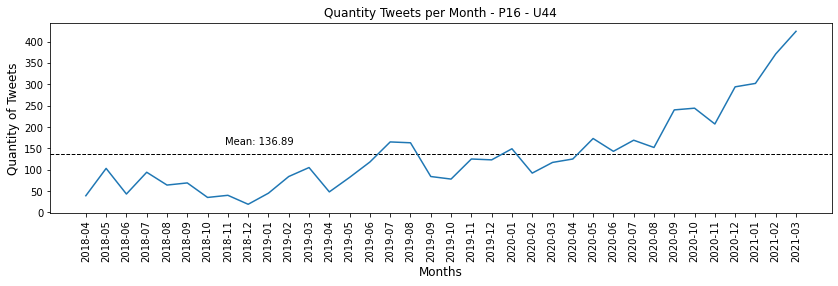

In [24]:
count = 1
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)

        tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
        tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

        df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

        df_result = pd.DataFrame(df["text"])
        df_result["YearMonth"] = list(df_result.index)

        create_line_plot(df_result, id_user, count)
#         create_histogram(df_result, id_user, count)
        count += 1

In [25]:
def totalize_data_by_month():
    df_result_all = {}
    all_df = []

    for c in data:
        id_user = c
        if data[id_user]['bigfive']:
            tweets_pd = create_tweets_pd(data, id_user)
            tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
            tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

            df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

            df_result = pd.DataFrame(df["text"])
            df_result["YearMonth"] = list(df_result.index)
            df_result_all = dict.fromkeys(list(df_result.index), 0)
            all_df.append(df_result)

    for d in df_result_all:
        for a in all_df:
            temp_df = a.loc[a['YearMonth']== d]
            if len(temp_df['text']) > 0:
                df_result_all[d] = df_result_all[d] + temp_df['text'][0]

    df_res = pd.DataFrame.from_records([df_result_all])
    df_res = df_res.transpose()
    return df_res

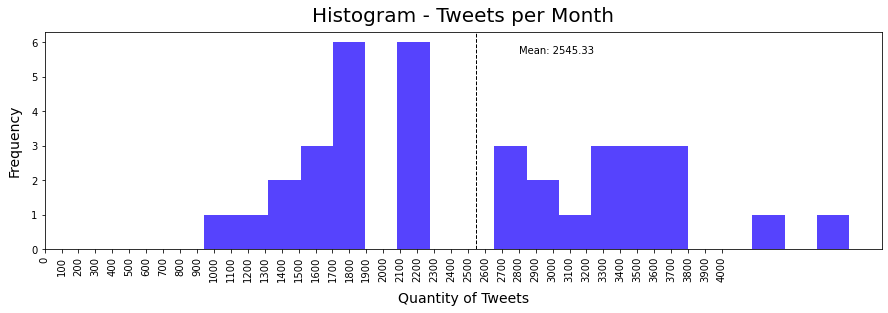

In [26]:
# HISTOGRAM OF TOTAL TWEETS, GROUPED BY MONTH

df = totalize_data_by_month()

fig = plt.figure(figsize=(15,4))

n, bins, patches = plt.hist(df, bins=20, color='#5643fd')

plt.xticks(np.arange(0, 4001, 100), rotation = 'vertical')

plt.axvline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.title('Histogram - Tweets per Month', fontsize=20, pad=10)
plt.xlabel('Quantity of Tweets', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)

plt.show()

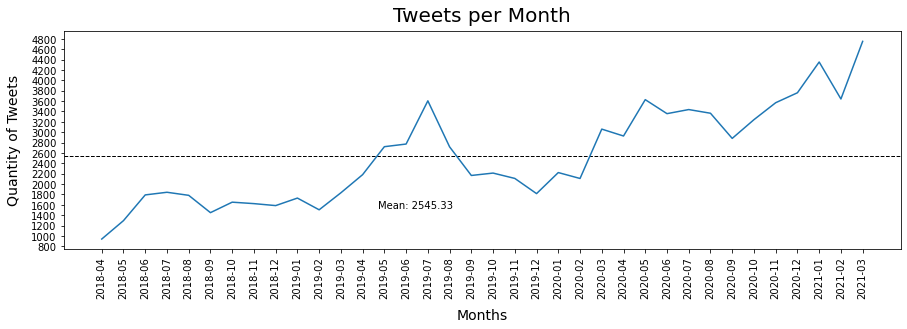

In [27]:
tickvalues = range(0,len(df.index))

fig = plt.figure(figsize=(15,4))

plt.xticks(ticks = tickvalues ,labels = df.index, rotation = 'vertical')
plt.yticks(np.arange(0, 5000, 200))

plt.title("Tweets per Month", fontsize=20, pad=10)
plt.ylabel("Quantity of Tweets", fontsize=14, labelpad=10)
plt.xlabel("Months", fontsize=14, labelpad=10)

plt.axhline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*0.005, max_ylim*0.32, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.plot(df)

In [118]:
all_tweets

created_at  vader_sentiment_analysis_score  \
0     2021-03-31T19:13:28                         -0.4588   
1     2021-03-31T12:28:56                          0.0000   
2     2021-03-31T12:17:06                          0.7734   
3     2021-03-31T11:46:04                         -0.8720   
4     2021-03-30T17:58:24                         -0.6808   
...                   ...                             ...   
4923  2020-08-17T19:09:02                          0.4939   
4924  2020-07-31T19:43:02                          0.3612   
4925  2020-10-08T20:29:24                          0.6114   
4926  2020-12-30T22:22:26                          0.4199   
4927  2021-02-11T18:21:29                          0.3382   

      oplexicon_sentiment_analysis_score  \
0                               0.000000   
1                               0.000000   
2                               0.458831   
3                               0.458831   
4                               0.000000   
...                                  ...   
4923                            0.000000   
4924                            0.000000   
4925                            0.000000   
4926                            0.329000   
4927                            0.454000   

      sentistrength_sentiment_analysis_score  \
0                                      0.000   
1                                      0.000   
2                                      0.000   
3                                      0.250   
4                                      0.000   
...                                      ...   
4923                                   0.250   
4924                                   0.250   
4925                                   0.250   
4926                                   0.329   
4927                                   0.329   

      sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                   0.000                         0.0000   
1                                   0.000                        -0.0667   
2                                   0.000                         0.0196   
3                                  -0.250                         0.0400   
4                                  -0.250                         0.0000   
...                                   ...                            ...   
4923                                0.000                         0.2000   
4924                                0.000                         0.0000   
4925                                0.250                        -0.0625   
4926                                0.329                         0.0000   
4927                                0.204                        -0.0625   

      final_score final_polarity  Participant  is_work_time  
0        0.000000            neu            1           0.0  
1        0.000000            neu            1           1.0  
2        0.000000            neu            1           1.0  
3        0.000000            neu            1           1.0  
4       -0.125000            neg            1           1.0  
...           ...            ...          ...           ...  
4923     0.250000            pos           16           1.0  
4924    -0.354415            neg           16           1.0  
4925     0.000000            neu           16           0.0  
4926     0.000000            neu           16           0.0  
4927    -0.125000            neg           16           1.0  

[91632 rows x 10 columns]

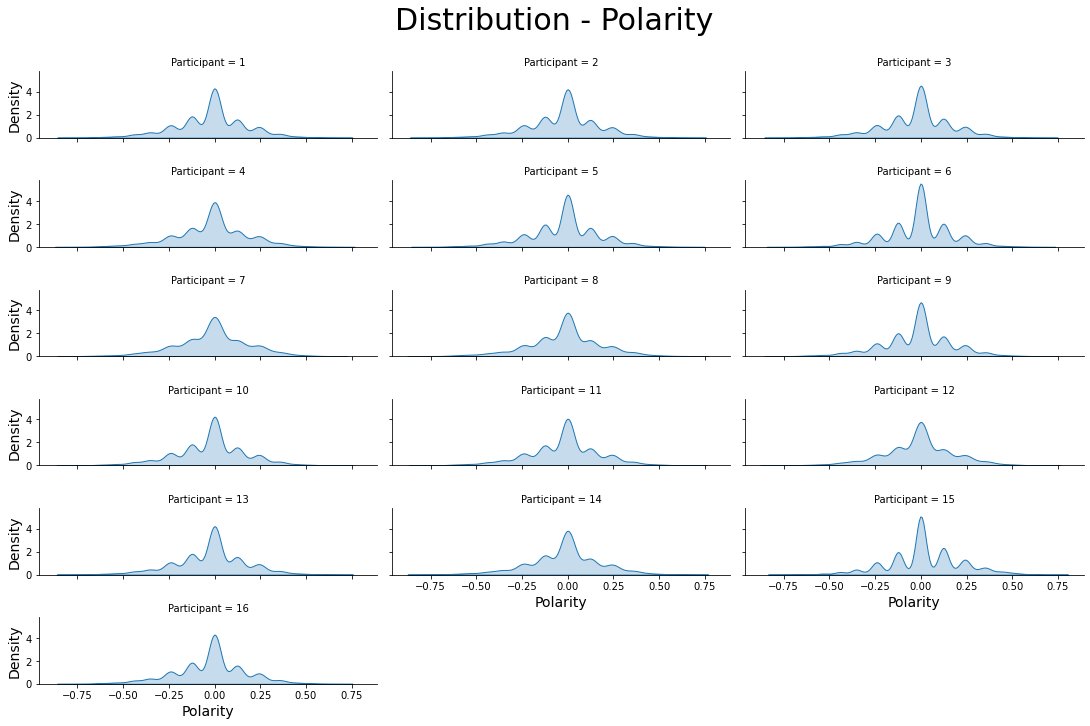

In [119]:
g = sns.FacetGrid(all_tweets, col="Participant", col_wrap=3)
g.fig.set_size_inches(15,10)
g.fig.suptitle('Distribution - Polarity', fontsize=30, y=1)
g.map(sns.kdeplot, "final_score", fill=True, palette="crest")
g.set_axis_labels("Polarity", 'Density', fontsize=14)

xl = ''
yl = ''

for ax in g.axes:
    xlabel = ax.xaxis.get_label_text()
    if xlabel:
        xl = xlabel
    ylabel = ax.yaxis.get_label_text()
    if ylabel:
        yl = ylabel

        
for ax in g.axes:
    xlabel = ax.xaxis.get_label_text()
    if not xlabel:
        ax.xaxis.set_label_text(xl)
    ylabel = ax.yaxis.get_label_text()
    if not ylabel:
        ax.yaxis.set_label_text(yl)
        

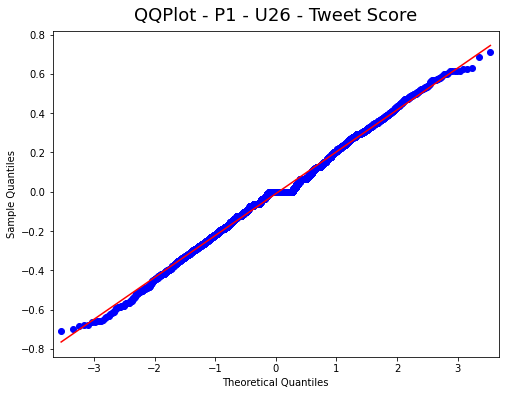

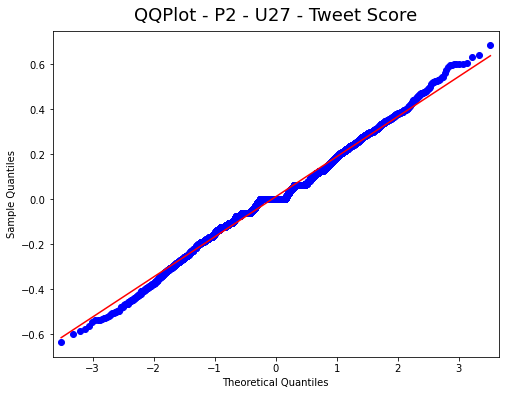

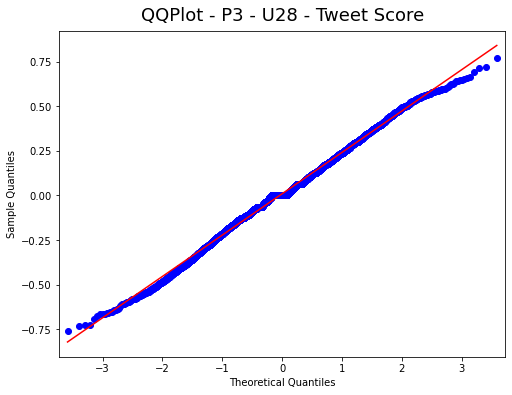

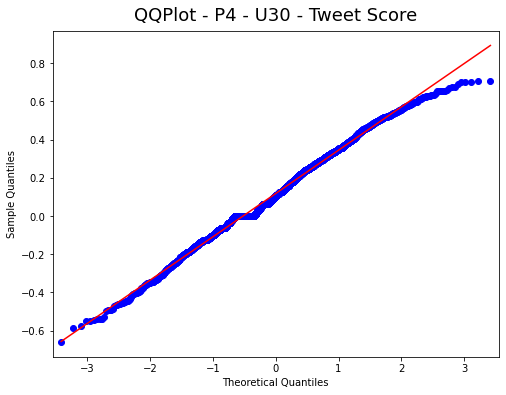

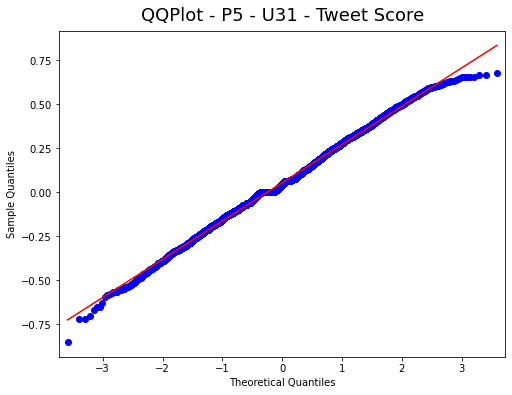

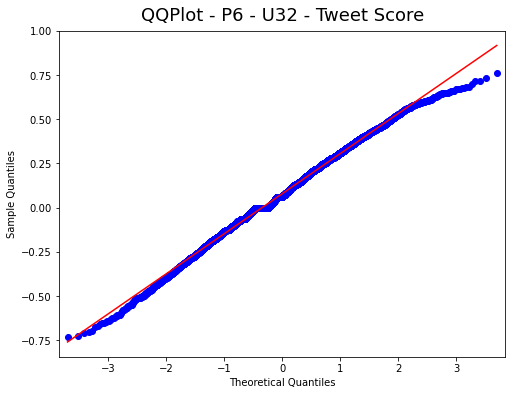

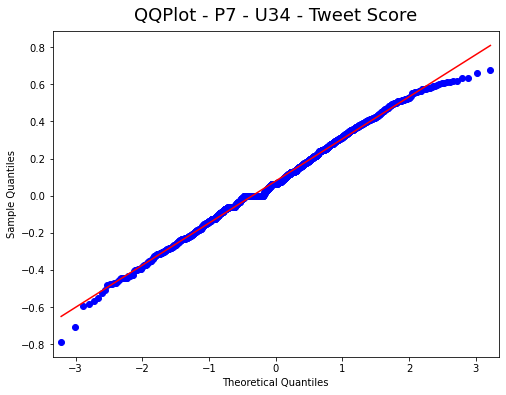

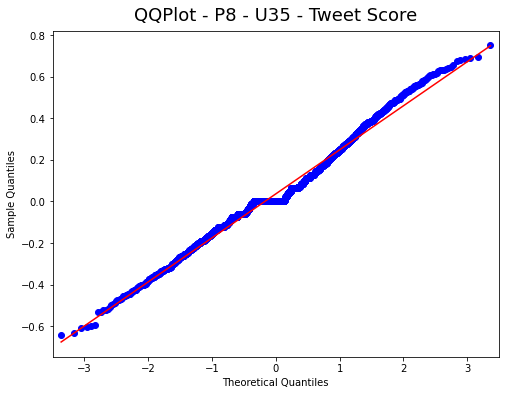

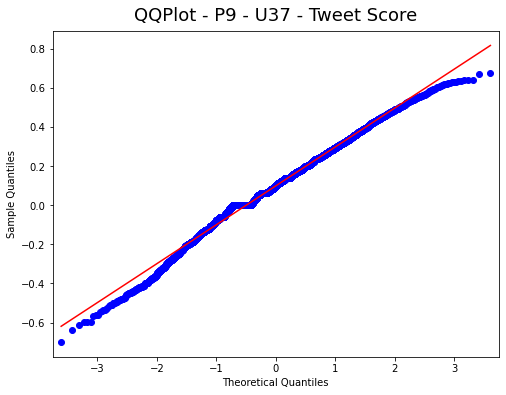

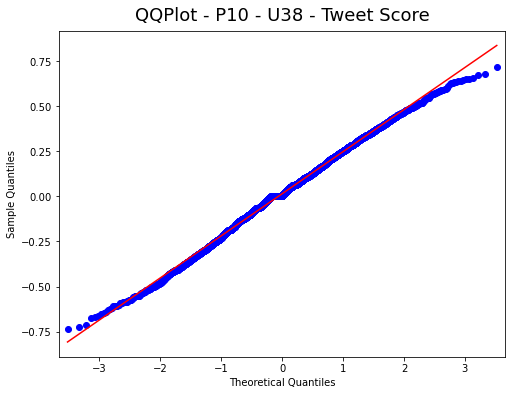

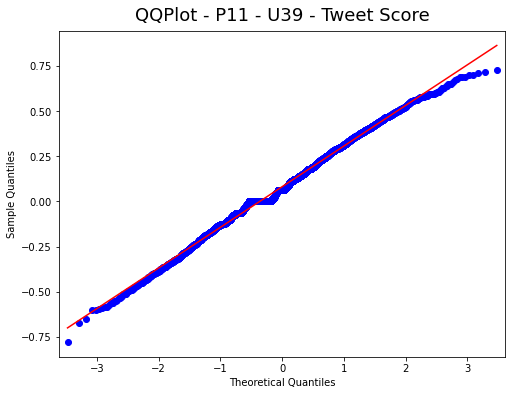

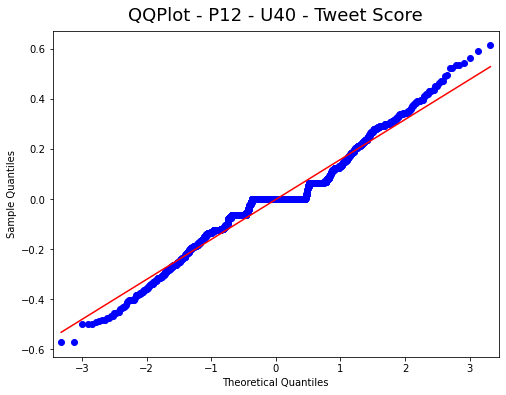

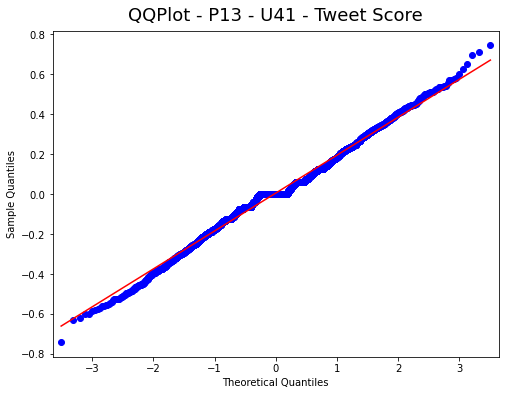

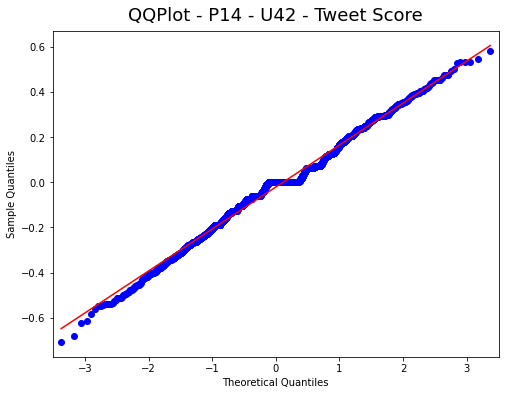

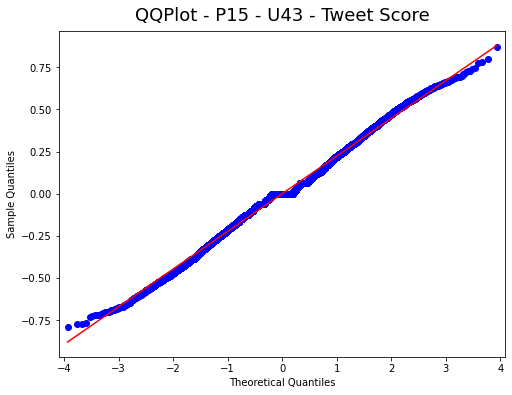

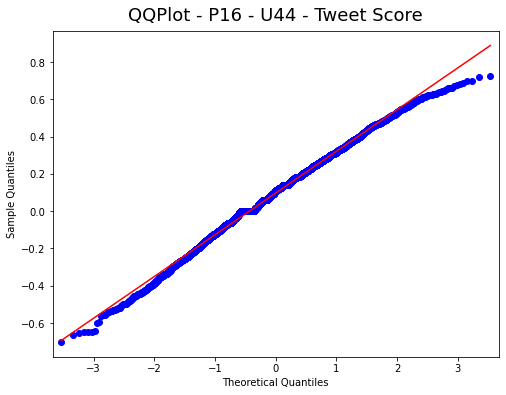

In [30]:
count = 1
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)
        fig = qqplot(tweets_pd['final_score'], line='s')
        fig.set_size_inches(8, 6)
        plt.title("QQPlot - P{} - U{} - Tweet Score".format(count, id_user), fontsize=18, pad=10)
        fig.savefig('images/qqplot_p{}_u{}.png'.format(count, id_user), bbox_inches='tight')
        count += 1

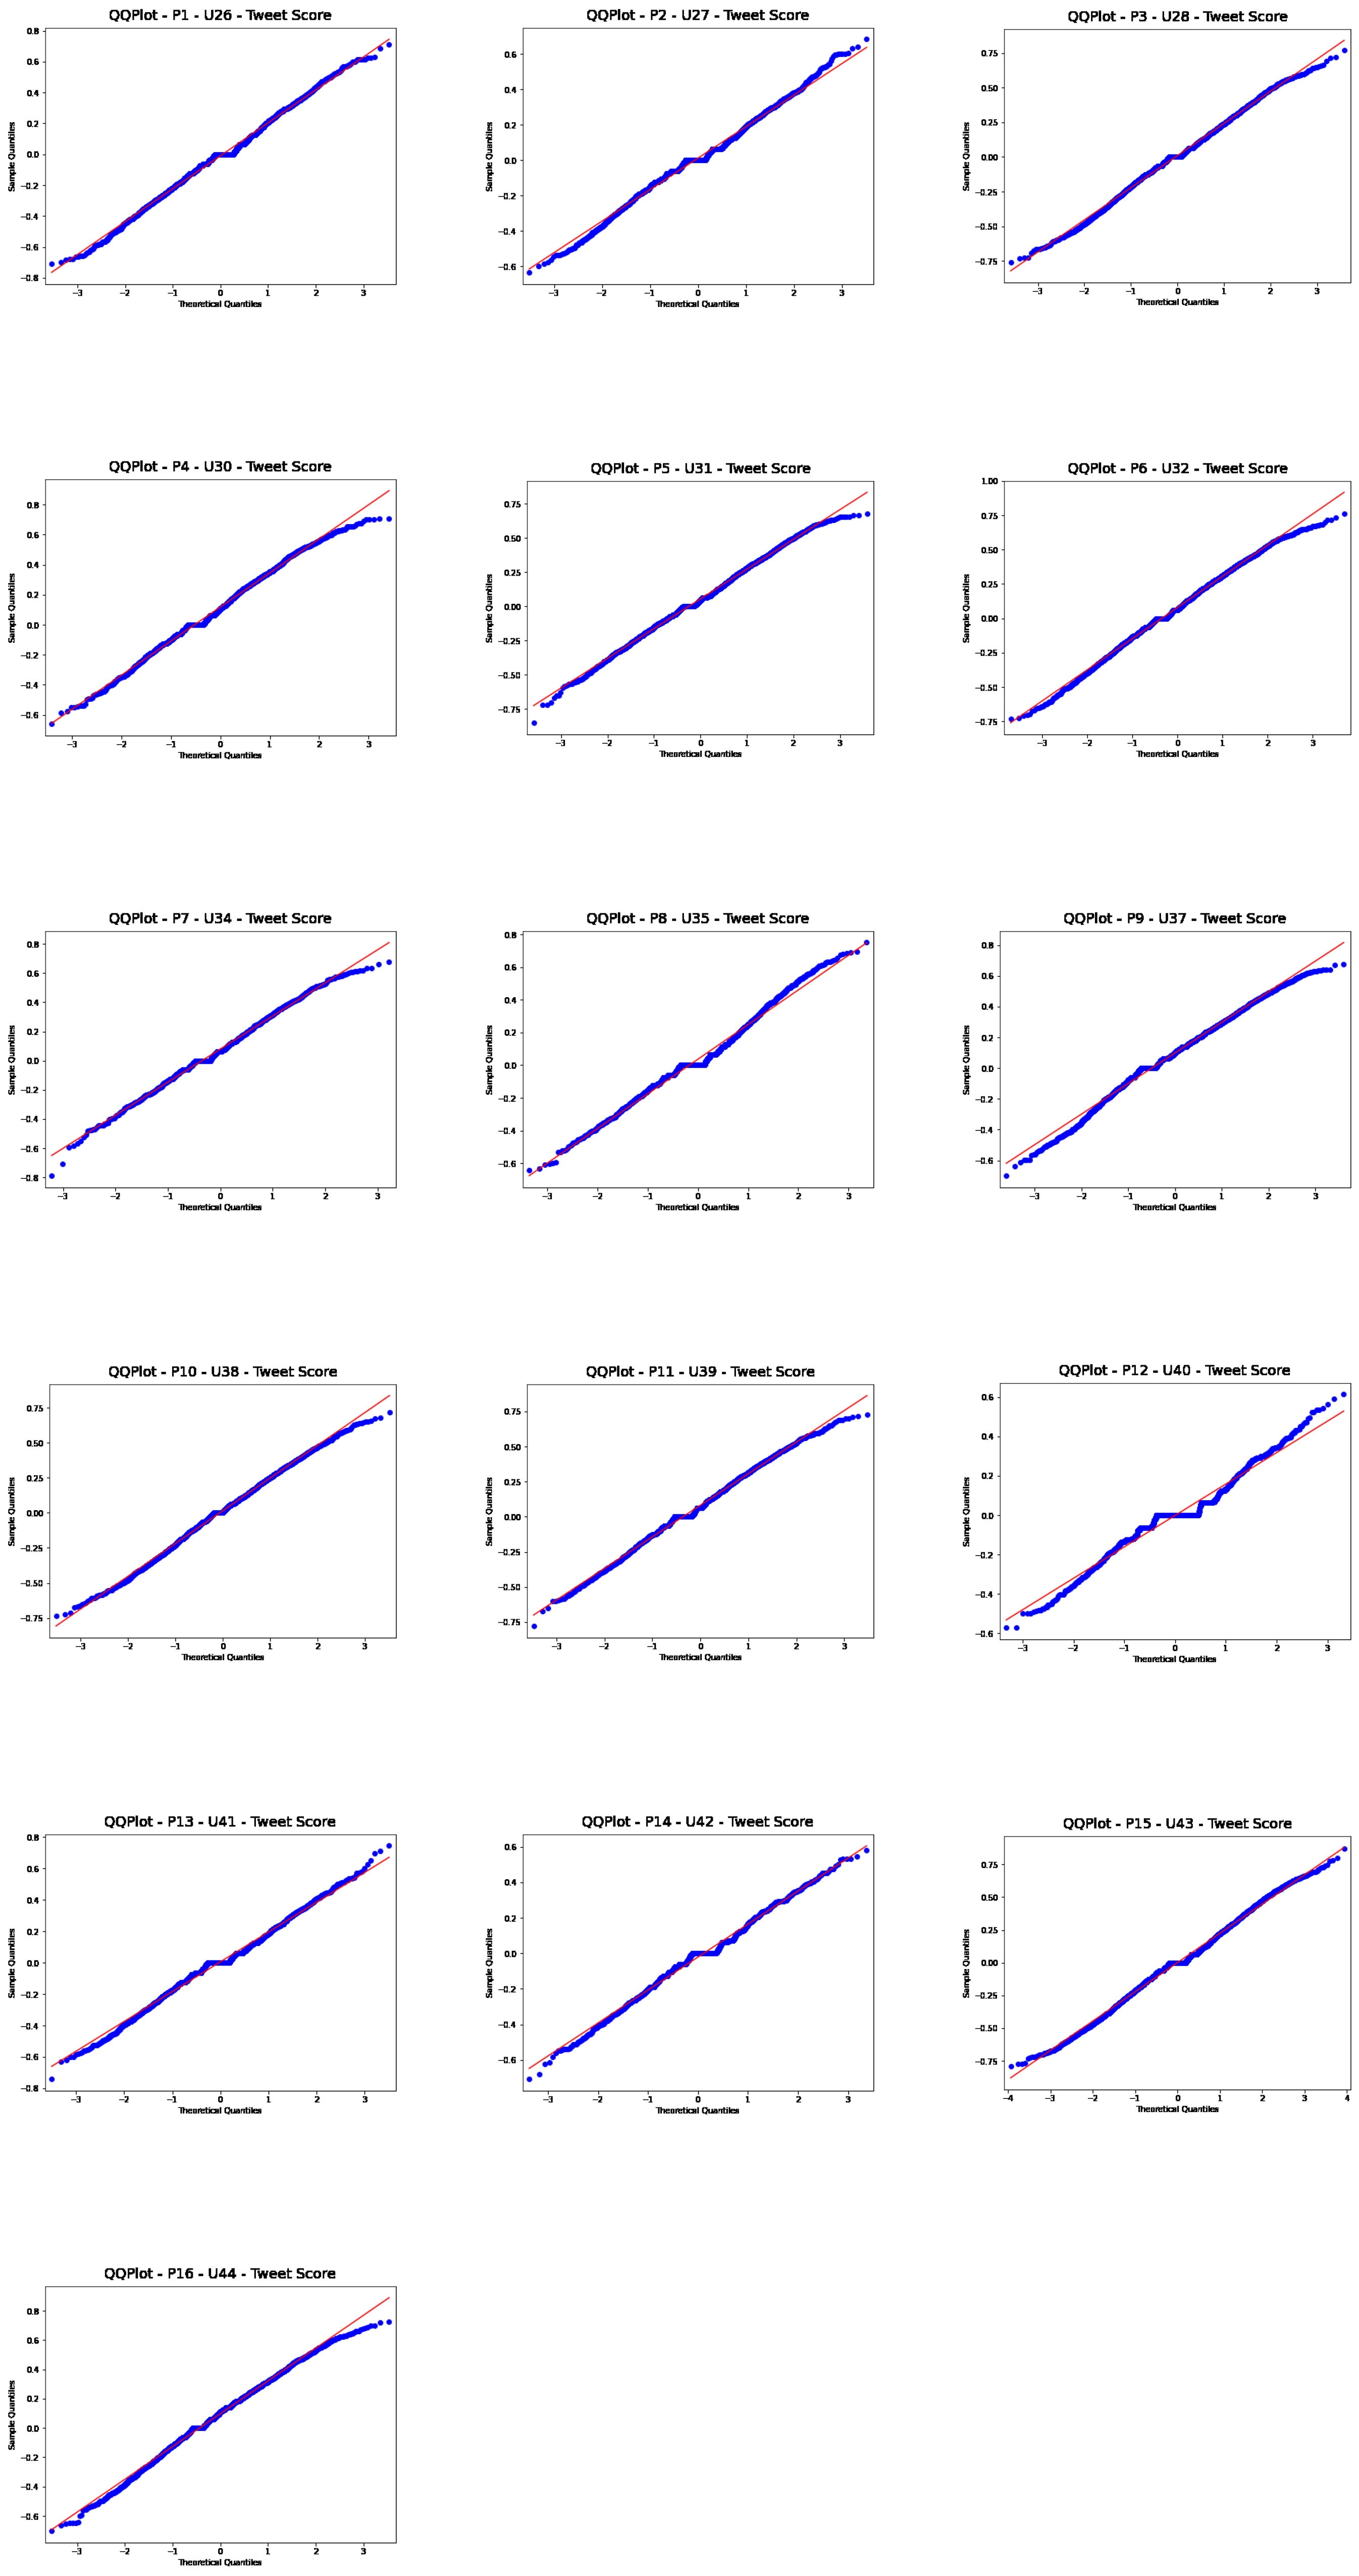

In [31]:
count = 1
images_list = []

for d in data:
    if data[d]['bigfive']:
#         image = plt.imread('images/qqplot_p{}_u{}.png'.format(count, d))
        image = cv2.imread('images/qqplot_p{}_u{}.png'.format(count, d))
        (b, g, r)=cv2.split(image)
        image=cv2.merge([r,g,b])
        images_list.append(image)
        count += 1
        
show_images(images_list, cols=3, rows=6)

In [120]:
bar_chart_data

[['P1', -0.022431010053592677, -0.03562655379886504],
 ['P2', -0.02342907017370272, -0.03720510165851954],
 ['P3', -0.022029596209541445, -0.03325946061497323],
 ['P4', -0.01833956616209397, -0.029048333816183804],
 ['P5', -0.022150330588186183, -0.03339560237969325],
 ['P6', -0.012610650968033986, -0.01957123307236058],
 ['P7', -0.010364501326860844, -0.01622406742654509],
 ['P8', -0.01674273988439306, -0.026524670329670322],
 ['P9', -0.02090218956242249, -0.0311990070622854],
 ['P10', -0.02268672666737467, -0.036059793771100586],
 ['P11', -0.021417322933569963, -0.033964584499396835],
 ['P12', -0.011599021521543986, -0.018511905408309454],
 ['P13', -0.022617792213862283, -0.03607332241818181],
 ['P14', -0.017687305522609338, -0.028070794294117643],
 ['P15', 0.02078056282655671, 0.018863366120325232],
 ['P16', -0.0228352195921266, -0.036324067834086475]]

In [123]:
data.head()

26                   27  \
id_str_twitter                23781146             15148309   
name                                 1                    2   
screen_name               Fe Rebelatto  Sommelier de Airbnb   
location                     rebelatto            Guilh_rm_   
url             Rio de Janeiro, Brasil  somewhere in Brazil   

                                28                                   29  \
id_str_twitter  927028057763995648                             77648005   
name                             3                                 None   
screen_name              ✪ Felippe  Conference Distinguished Specialist   
location            FelippeRegazio                              NannoKa   
url                                                      Ctba-PR Brasil   

                           30                        31                   32  \
id_str_twitter     3429765093                  10794662  1034514325644431361   
name                        4                         5                    6   
screen_name     Paula Santana  Maharaja of the Legacies              Jessica   
location           psanrosa13                    rponte            dev_jessi   
url                    Brasil             Ceará, Brazil   São Paulo - Brasil   

                                           33                 34  \
id_str_twitter                      529445600           12050562   
name                                     None                  7   
screen_name     var nickname = "Riquettinha";  Roberta Arcoverde   
location                          Riquettinha               rla4   
url                    Belo Horizonte, Brasil  Sao Paulo, Brazil   

                             35                       36  \
id_str_twitter         62314491                 18289937   
name                          8                     None   
screen_name            Gabriela          Thamara Andrade   
location        Gabrielathalita                   thamyk   
url              Belo Horizonte  Belo Horizonte, Brazil.   

                                   37                      38  \
id_str_twitter              172880784                18609547   
name                                9                      10   
screen_name               felipe.ts ⚡              Juan Lopes   
location                felipefialho_              juanplopes   
url             Dark Side of the Moon  Rio de Janeiro, Brasil   

                               39                   40  \
id_str_twitter         2164986296  1026783544457273345   
name                           11                   12   
screen_name         Rafael Dantas          iagor com i   
location           RaffaelDantass              Iagor51   
url             São Paulo, Brasil                  Pvh   

                                           41                      42  \
id_str_twitter                      109604376     1040939562774790144   
name                                       13                      14   
screen_name     T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷           Esdras Xavier   
location                       RafaelMansilha          esdras_xavieer   
url                 Palmas, Tocantins, Brasil  Jaraguá do Sul, Brasil   

                                                   43                  44  
id_str_twitter                               69734383           119897261  
name                                               15                  16  
screen_name     belle-🏴.dev || twitch.tv/bellesamways      Willian Justen  
location                                 bellesamways      Willian_justen  
url                                          Curitiba  Petrópolis, Brasil

In [128]:
df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    r = bf.query('Participant == {}'.format(i))
    print(r['Id User'])

0    26
Name: Id User, dtype: int64
1    27
Name: Id User, dtype: int64
2    28
Name: Id User, dtype: int64
3    30
Name: Id User, dtype: int64
4    31
Name: Id User, dtype: int64
5    32
Name: Id User, dtype: int64
6    34
Name: Id User, dtype: int64
7    35
Name: Id User, dtype: int64
8    37
Name: Id User, dtype: int64
9    38
Name: Id User, dtype: int64
10    39
Name: Id User, dtype: int64
11    40
Name: Id User, dtype: int64
12    41
Name: Id User, dtype: int64
13    42
Name: Id User, dtype: int64
14    43
Name: Id User, dtype: int64
15    44
Name: Id User, dtype: int64


In [150]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : [],
            'O': [],
            'C': [],
            'E': [],
            'A': [],
            'N': []
          }

df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    vader_df = t[['final_score', 'final_polarity']].copy()
    qtd_pos = vader_df.query('final_polarity == "pos"').count()
    qtd_neu = vader_df.query('final_polarity == "neu"').count()
    qtd_neg = vader_df.query('final_polarity == "neg"').count()
    qtd_total = vader_df['final_polarity'].count()
    df_dict['id_user'].append(bigfive['Id User'].iloc[0])
#     print(type(bigfive['Id User'].iloc[0]))
    df_dict['pos'].append(qtd_pos.iloc[0])
    df_dict['neu'].append(qtd_neu.iloc[0])
    df_dict['neg'].append(qtd_neg.iloc[0])
    df_dict['por_pos'].append(((qtd_pos / qtd_total) * 100).iloc[0])
    df_dict['por_neu'].append(((qtd_neu / qtd_total) * 100).iloc[0])
    df_dict['por_neg'].append(((qtd_neg / qtd_total) * 100).iloc[0])
    df_dict['mean'].append(vader_df['final_score'].mean())

    df_dict['O'].append(bigfive['O'].iloc[0])
    df_dict['C'].append(bigfive['C'].iloc[0])
    df_dict['E'].append(bigfive['E'].iloc[0])
    df_dict['A'].append(bigfive['A'].iloc[0])
    df_dict['N'].append(bigfive['N'].iloc[0])

df_chart = pd.DataFrame(df_dict)
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg      mean   O  \
0        26  1408  1866  1764  27.947598  37.038507  35.013894 -0.022431  37   
1        27  1263  1684  1601  27.770449  37.027265  35.202287 -0.023429  41   
2        28  1682  2192  2058  28.354686  36.952124  34.693189 -0.022030  43   
3        30   916  1169  1086  28.886787  36.865342  34.247871 -0.018340  17   
4        31  1707  2211  2075  28.483230  36.893042  34.623728 -0.022150  22   
5        32  2614  3484  3287  27.852957  37.123069  35.023974 -0.012611  39   
6        34   476   558   511  30.809061  36.116505  33.074434 -0.010365  35   
7        35   751   957   887  28.940270  36.878613  34.181118 -0.016743  29   
8        37  1848  2378  2230  28.624535  36.833953  34.541512 -0.020902  40   
9        38  1313  1746  1649  27.888700  37.085811  35.025489 -0.022687  32   
10       39  1114  1457  1373  28.245436  36.942191  34.812373 -0.021417  31   
11       40   659   832   737  29.578097  37.342908  33.078995 -0.011599  36   
12       41  1218  1636  1532  27.770178  37.300502  34.929321 -0.022618  29   
13       42   777   998   923  28.799110  36.990363  34.210526 -0.017687  29   
14       43  6744  8943  8390  28.010134  37.143332  34.846534  0.020781  29   
15       44  1373  1830  1725  27.861201  37.134740  35.004058 -0.022835  30   

     C   E   A   N  
0   43  36  24  26  
1   43  34  22  23  
2   46  31  24  15  
3   33  33  22  39  
4   33  31  20   8  
5   49  39  28  15  
6   35  32  26  16  
7   45  34  35  29  
8   46  38  22  21  
9   46  19  18  28  
10  36  25  33  21  
11  45  31  31  19  
12  41  28  22  28  
13  43  27  23  35  
14  45  36  27  32  
15  35  24  20  32

In [122]:
data.head()

26                   27  \
id_str_twitter                23781146             15148309   
name                                 1                    2   
screen_name               Fe Rebelatto  Sommelier de Airbnb   
location                     rebelatto            Guilh_rm_   
url             Rio de Janeiro, Brasil  somewhere in Brazil   

                                28                                   29  \
id_str_twitter  927028057763995648                             77648005   
name                             3                                 None   
screen_name              ✪ Felippe  Conference Distinguished Specialist   
location            FelippeRegazio                              NannoKa   
url                                                      Ctba-PR Brasil   

                           30                        31                   32  \
id_str_twitter     3429765093                  10794662  1034514325644431361   
name                        4                         5                    6   
screen_name     Paula Santana  Maharaja of the Legacies              Jessica   
location           psanrosa13                    rponte            dev_jessi   
url                    Brasil             Ceará, Brazil   São Paulo - Brasil   

                                           33                 34  \
id_str_twitter                      529445600           12050562   
name                                     None                  7   
screen_name     var nickname = "Riquettinha";  Roberta Arcoverde   
location                          Riquettinha               rla4   
url                    Belo Horizonte, Brasil  Sao Paulo, Brazil   

                             35                       36  \
id_str_twitter         62314491                 18289937   
name                          8                     None   
screen_name            Gabriela          Thamara Andrade   
location        Gabrielathalita                   thamyk   
url              Belo Horizonte  Belo Horizonte, Brazil.   

                                   37                      38  \
id_str_twitter              172880784                18609547   
name                                9                      10   
screen_name               felipe.ts ⚡              Juan Lopes   
location                felipefialho_              juanplopes   
url             Dark Side of the Moon  Rio de Janeiro, Brasil   

                               39                   40  \
id_str_twitter         2164986296  1026783544457273345   
name                           11                   12   
screen_name         Rafael Dantas          iagor com i   
location           RaffaelDantass              Iagor51   
url             São Paulo, Brasil                  Pvh   

                                           41                      42  \
id_str_twitter                      109604376     1040939562774790144   
name                                       13                      14   
screen_name     T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷           Esdras Xavier   
location                       RafaelMansilha          esdras_xavieer   
url                 Palmas, Tocantins, Brasil  Jaraguá do Sul, Brasil   

                                                   43                  44  
id_str_twitter                               69734383           119897261  
name                                               15                  16  
screen_name     belle-🏴.dev || twitch.tv/bellesamways      Willian Justen  
location                                 bellesamways      Willian_justen  
url                                          Curitiba  Petrópolis, Brasil

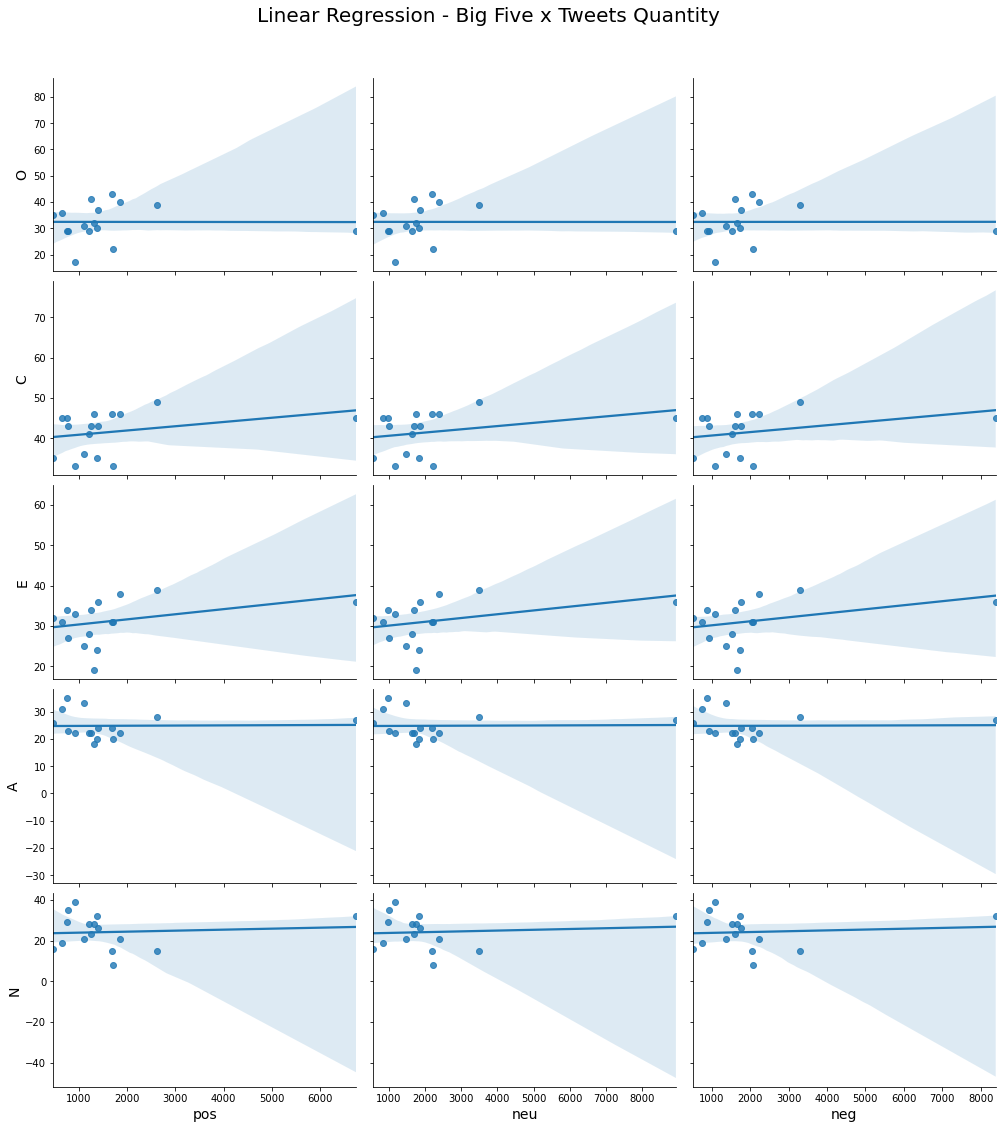

In [151]:
g = sns.pairplot(data=df_chart, x_vars=['pos', 'neu', 'neg'], y_vars=['O','C','E','A','N'], kind='reg')
g.fig.set_size_inches(15,15)
g.fig.suptitle('Linear Regression - Big Five x Tweets Quantity', fontsize=20, y=1.05)

for ax in g.axes:
    for a in ax:
        a.set_ylabel(a.get_ylabel(), fontsize=14)
        a.set_xlabel(a.get_xlabel(), fontsize=14)

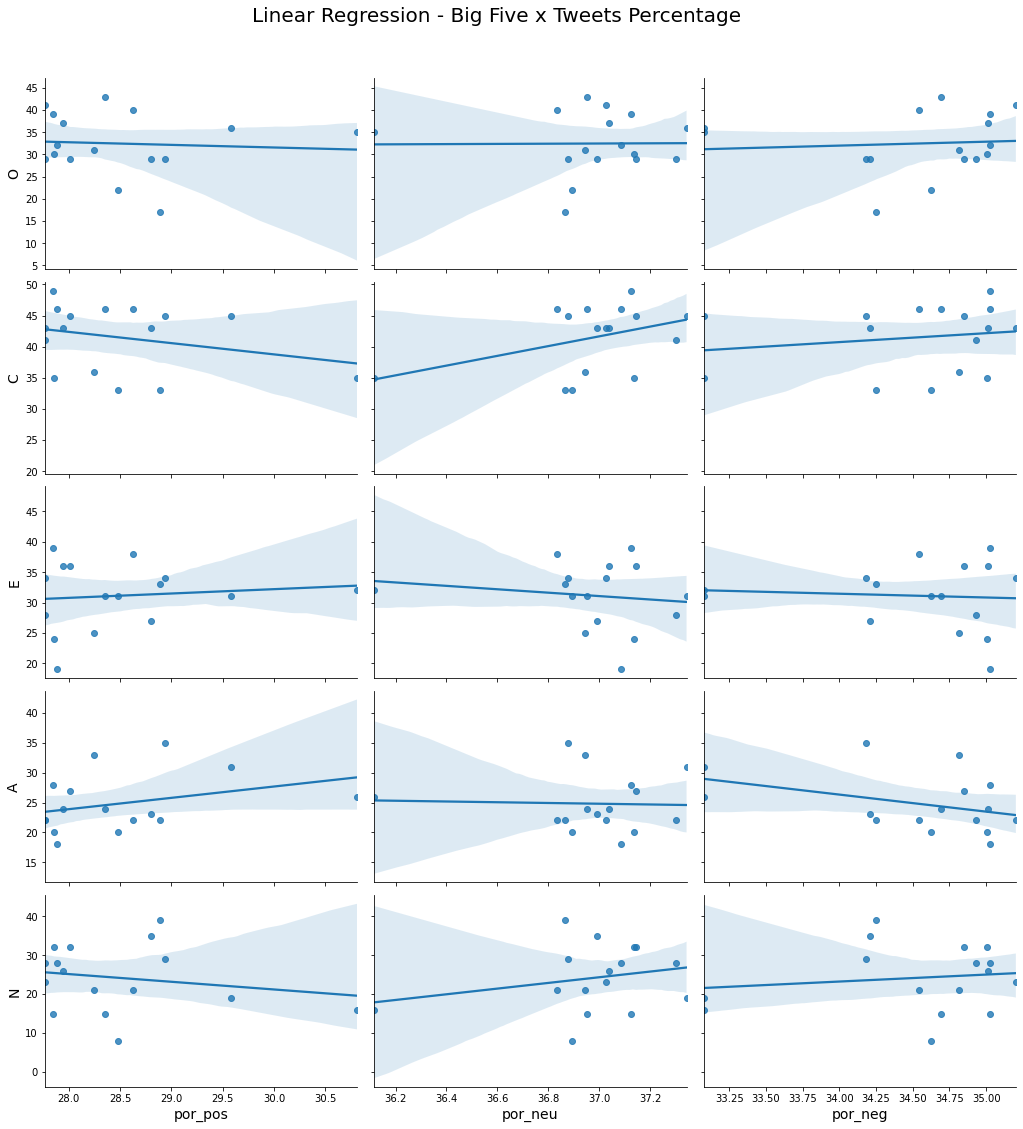

In [152]:
g = sns.pairplot(data=df_chart, x_vars=['por_pos', 'por_neu', 'por_neg'], y_vars=['O','C','E','A','N'], kind='reg')
g.fig.set_size_inches(15,15)
g.fig.suptitle('Linear Regression - Big Five x Tweets Percentage', fontsize=20, y=1.05)

for ax in g.axes:
    for a in ax:
        a.set_ylabel(a.get_ylabel(), fontsize=14)
        a.set_xlabel(a.get_xlabel(), fontsize=14)

In [153]:
count = 1
all_df = pd.DataFrame()
df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    id_user = bigfive['Id User'].iloc[0]

    t = t.sort_values(by='created_at')

    t["created_at"] = pd.to_datetime(t["created_at"])
    t['date_minus_time'] = t["created_at"].apply(lambda t : datetime.datetime(year=t.year, 
                                                                              month=t.month,
                                                                              day=t.day))
    t.set_index(t["date_minus_time"],inplace=True)

    df_pos = t.query("final_polarity == 'pos'")
    df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
#     df_pos['polarity'] = ["pos" for i in df_pos['final_score']]

    df_neg = t.query("final_polarity == 'neg'")
    df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())
#     df_pos['polarity'] = ["neg" for i in df_neg['final_score']]

    df_final = df_pos.append(df_neg)
    df_final = df_final.fillna(0)
#     df_final.columns = ['final_score_pos', 'final_score_neg']

#     df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
    df_final['id_user'] = id_user
    df_final['date'] = df_final.index
    df_final = df_final.reset_index(drop=True)

    df_final.sort_values(by=['date'])
    df_final['Participant'] = count

    if all_df.empty:
        all_df = df_final
    else:
        all_df = all_df.append(df_final)

#     plot_point_chart_pos_neg(df_final, count, id_user)

    count += 1
    

all_df['pol'] = np.where(all_df['final_score'] > 0, 'pos', np.where(all_df['final_score'] < 0, 'neg', 'neu'))
all_df

final_score  id_user       date  Participant  pol
0        0.166667       26 2018-04-02            1  pos
1        0.000000       26 2018-04-03            1  neu
2        0.239708       26 2018-04-04            1  pos
3        0.000000       26 2018-04-05            1  neu
4        0.250000       26 2018-04-06            1  pos
...           ...      ...        ...          ...  ...
2185     0.000000       44 2021-03-27           16  neu
2186    -0.285124       44 2021-03-28           16  neg
2187     0.000000       44 2021-03-29           16  neu
2188    -0.104415       44 2021-03-30           16  neg
2189    -0.182354       44 2021-03-31           16  neg

[33887 rows x 5 columns]

In [154]:
mean_df = all_df.groupby(['Participant', 'id_user', 'date'], as_index=False)['final_score'].mean()
mean_df['pol'] = 'mean'
mean_df = mean_df[['final_score','id_user','date','Participant','pol']]
mean_df

final_score  id_user       date  Participant   pol
0         0.166667       26 2018-04-02            1  mean
1        -0.125000       26 2018-04-03            1  mean
2         0.000000       26 2018-04-04            1  mean
3         0.000000       26 2018-04-05            1  mean
4         0.062500       26 2018-04-06            1  mean
...            ...      ...        ...          ...   ...
16961     0.000000       44 2021-03-27           16  mean
16962    -0.058961       44 2021-03-28           16  mean
16963     0.125000       44 2021-03-29           16  mean
16964     0.054594       44 2021-03-30           16  mean
16965    -0.001010       44 2021-03-31           16  mean

[16966 rows x 5 columns]

In [39]:
# all_df = all_df.append(mean_df)
# all_df

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


[None, None]

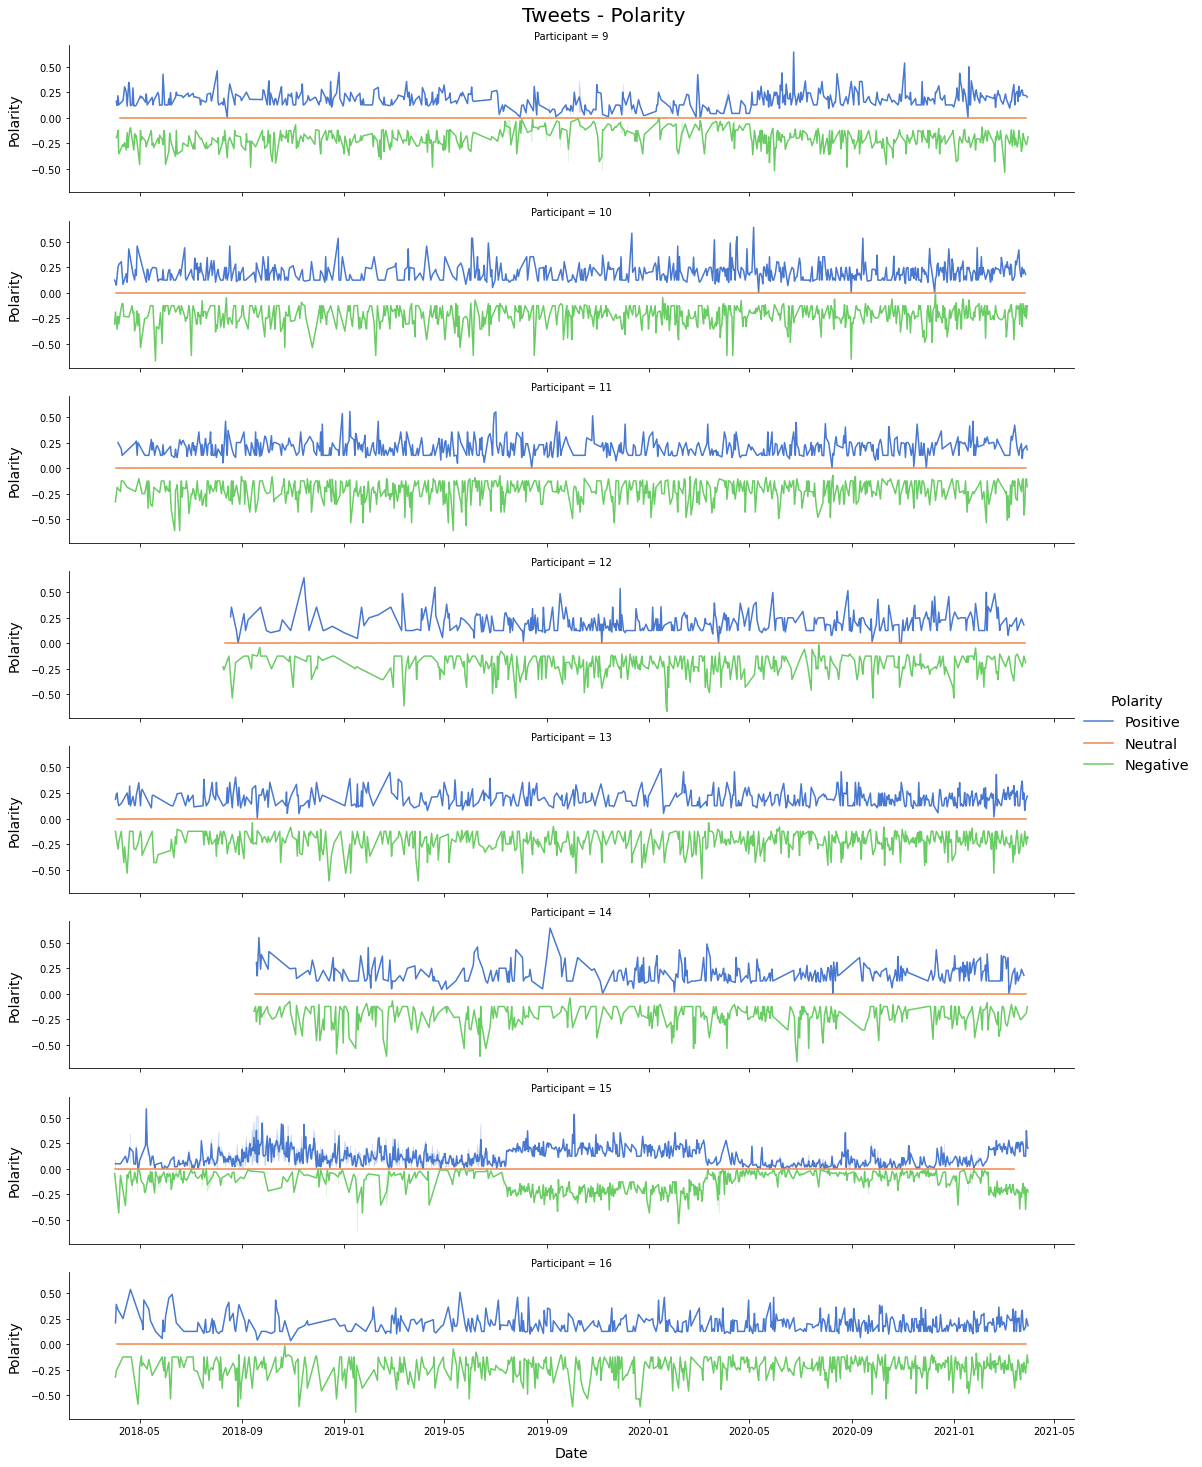

In [156]:
g = sns.FacetGrid(all_df.query('Participant > 8'), row="Participant", hue='pol', legend_out=True, palette="muted")
g.fig.set_size_inches(15,20)
g.map(sns.lineplot, 'date', "final_score")

g.fig.suptitle('Tweets - Polarity', fontsize=20, y=1.01)
g.set_axis_labels("Date", 'Polarity', fontsize=14)
        
for ax in g.axes:
    for a in ax:
        a.set_ylabel("Polarity", fontsize=14, labelpad=10)
        a.set_xlabel("Date", fontsize=14, labelpad=10)
        
g.add_legend(fontsize='x-large', title="Polarity", labels=['Positive', 'Neutral', 'Negative'])
plt.setp(g._legend.get_title(), fontsize=14)

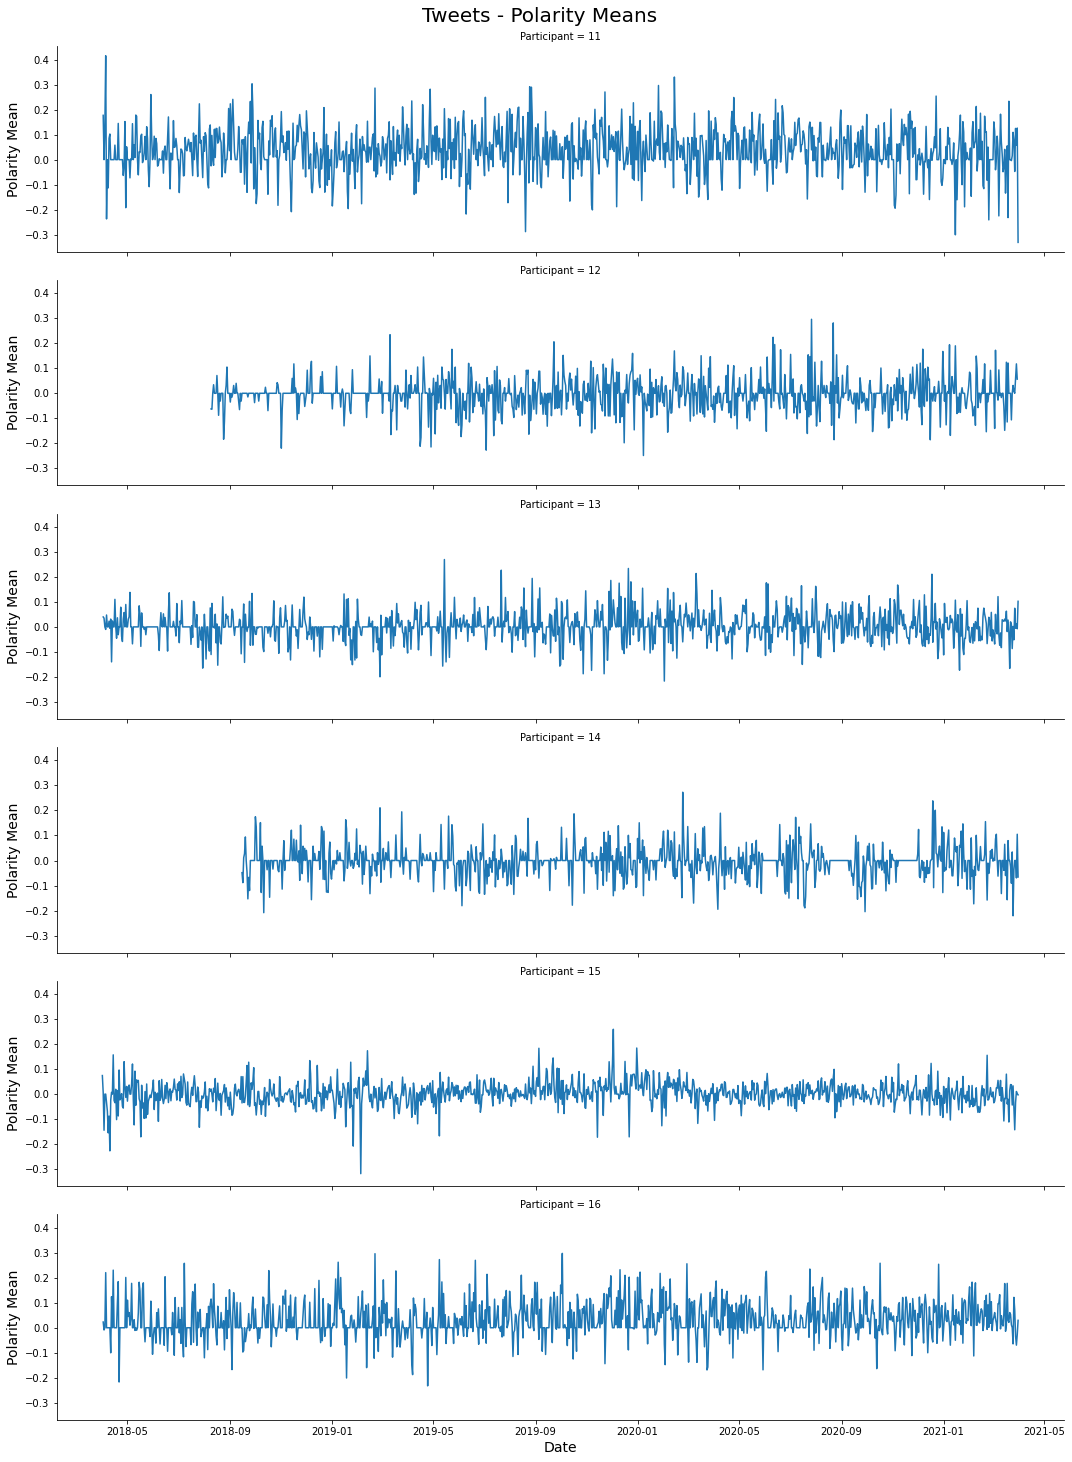

In [41]:
g = sns.FacetGrid(mean_df.query('Participant > 10'), row="Participant")
g.fig.set_size_inches(15,20)
g.map(sns.lineplot, 'date', "final_score")

g.fig.suptitle('Tweets - Polarity Means', fontsize=20, y=1.01)
g.set_axis_labels("Date", 'Polarity Mean', fontsize=14)
        
for ax in g.axes:
    for a in ax:
        a.set_ylabel("Polarity Mean", fontsize=14)
        a.set_xlabel("Date", fontsize=14)

In [42]:
all_tweets['final_score'].describe()

count    91632.000000
mean         0.034589
std          0.220280
min         -0.851526
25%         -0.097457
50%          0.000000
75%          0.177208
max          0.872022
Name: final_score, dtype: float64

[Text(0, 1, '')]

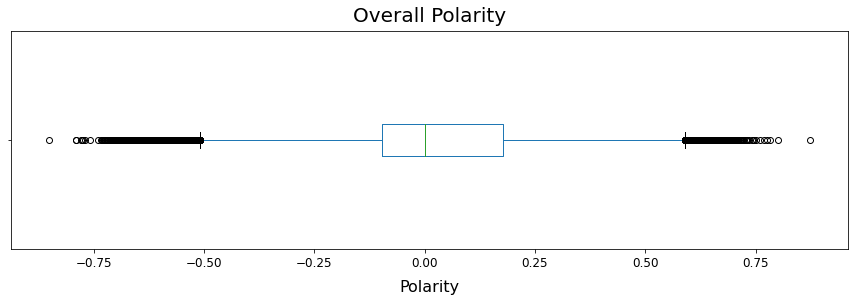

In [43]:
bplot = all_tweets.boxplot(column=['final_score'], grid=False, figsize=(15,4), vert=False)
# y_range = range(0,4501, 500)

bplot.axes.set_title("Overall Polarity", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
# bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_yticklabels([''])

In [175]:
count = 1
bf_df = pd.DataFrame()

df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    bigfive.columns = ['Participant', 'id_user', 'O', 'C', 'E', 'A', 'N']
    bigfive['Participant'] = 'P{}'.format(count)
#     del b['id']
    del bigfive['id_user']
#     bigfive = bigfive[['id_user', 'Participant', 'O', 'C', 'E', 'A', 'N']]
    if bf_df.empty:
        bf_df = bigfive
    else:
        bf_df = bf_df.append(bigfive)
    count +=1

df1 = create_boxplot_chart_data(all_tweets, False)
df2 = create_boxplot_chart_data(all_tweets, True)
df = df1.merge(df2)
# print(df)
# print(bf_df)
df = df.merge(bf_df)
df

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Participant   pos   neu   neg    por_pos    por_neu    por_neg   O   C   E  \
0           P1  1408  1866  1764  27.947598  37.038507  35.013894  37  43  36   
1           P2  1263  1684  1601  27.770449  37.027265  35.202287  41  43  34   
2           P3  1682  2192  2058  28.354686  36.952124  34.693189  43  46  31   
3           P4   916  1169  1086  28.886787  36.865342  34.247871  17  33  33   
4           P5  1707  2211  2075  28.483230  36.893042  34.623728  22  33  31   
5           P6  2614  3484  3287  27.852957  37.123069  35.023974  39  49  39   
6           P7   476   558   511  30.809061  36.116505  33.074434  35  35  32   
7           P8   751   957   887  28.940270  36.878613  34.181118  29  45  34   
8           P9  1848  2378  2230  28.624535  36.833953  34.541512  40  46  38   
9          P10  1313  1746  1649  27.888700  37.085811  35.025489  32  46  19   
10         P11  1114  1457  1373  28.245436  36.942191  34.812373  31  36  25   
11         P12   659   832   737  29.578097  37.342908  33.078995  36  45  31   
12         P13  1218  1636  1532  27.770178  37.300502  34.929321  29  41  28   
13         P14   777   998   923  28.799110  36.990363  34.210526  29  43  27   
14         P15  6744  8943  8390  28.010134  37.143332  34.846534  29  45  36   
15         P16  1373  1830  1725  27.861201  37.134740  35.004058  30  35  24   

     A   N  
0   24  26  
1   22  23  
2   24  15  
3   22  39  
4   20   8  
5   28  15  
6   26  16  
7   35  29  
8   22  21  
9   18  28  
10  33  21  
11  31  19  
12  22  28  
13  23  35  
14  27  32  
15  20  32

In [176]:
df.rcorr(method='spearman', upper='pval', decimals=3, padjust=None, stars=False)

pos     neu     neg por_pos por_neu por_neg       O       C  \
pos           -      0.      0.   0.030   0.451   0.019   0.402   0.151   
neu         1.0       -      0.   0.030   0.451   0.019   0.402   0.151   
neg         1.0     1.0       -   0.030   0.451   0.019   0.402   0.151   
por_pos  -0.541  -0.541  -0.541       -   0.023   0.000   0.448   0.571   
por_neu   0.203   0.203   0.203  -0.565       -   0.064   0.857   0.334   
por_neg   0.579   0.579   0.579  -0.938   0.474       -   0.255   0.391   
O         0.225   0.225   0.225  -0.204   0.049   0.302       -   0.014   
C         0.376   0.376   0.376  -0.153   0.259    0.23   0.602       -   
E         0.387   0.387   0.387   0.055  -0.188   0.006   0.296   0.343   
A        -0.261  -0.261  -0.261   0.368  -0.006  -0.383   0.138   0.268   
N        -0.217  -0.217  -0.217  -0.047   0.142   0.025  -0.538  -0.206   

              E       A      N  
pos       0.139   0.329   0.42  
neu       0.139   0.329   0.42  
neg       0.139   0.329   0.42  
por_pos   0.841   0.161  0.862  
por_neu   0.487   0.983  0.601  
por_neg   0.983   0.143  0.927  
O         0.265    0.61  0.032  
C         0.193   0.316  0.443  
E             -    0.18  0.512  
A         0.353       -  0.534  
N        -0.177  -0.168      -

Text(0.5, 1.0, 'Correlation matrix')

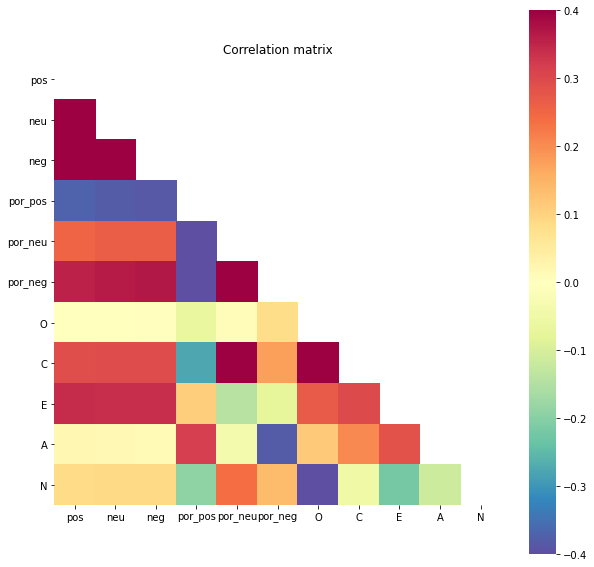

In [177]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [47]:
# Test equality of variance
pg.homoscedasticity(df[['pos', 'neg', 'O', 'C', 'E', 'A', 'N']])

W      pval  equal_var
levene  1.090985  0.375031       True

In [48]:
all_tweets

created_at  id_user  final_score final_polarity  Participant
0     2021-03-31T19:13:28       26    -0.114700            neg            1
1     2021-03-31T12:28:56       26     0.000000            neu            1
2     2021-03-31T12:17:06       26     0.308058            pos            1
3     2021-03-31T11:46:04       26    -0.103292            neg            1
4     2021-03-30T17:58:24       26    -0.232700            neg            1
...                   ...      ...          ...            ...          ...
4923  2020-08-17T19:09:02       44     0.185975            pos           16
4924  2020-07-31T19:43:02       44     0.152800            pos           16
4925  2020-10-08T20:29:24       44     0.277850            pos           16
4926  2020-12-30T22:22:26       44     0.351725            pos           16
4927  2021-02-11T18:21:29       44     0.331300            pos           16

[91632 rows x 5 columns]

In [161]:
# Test equality of variance
pg.homoscedasticity(all_tweets[['final_score', 'final_polarity', 'Participant']])

W  pval  equal_var
levene  3.386245e+32   0.0      False

In [160]:
pg.normality(all_tweets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


W  pval  normal
vader_sentiment_analysis_score          0.972016   0.0   False
oplexicon_sentiment_analysis_score      0.947366   0.0   False
sentistrength_sentiment_analysis_score  0.909519   0.0   False
sentilexpt_sentiment_analysis_score     0.921986   0.0   False
liwc_sentiment_analysis_score           0.848185   0.0   False
final_score                             0.958751   0.0   False
Participant                             0.890149   0.0   False
is_work_time                            0.629558   0.0   False

Text(0.5, 1.0, 'KDE - All Participants - Tweet Score')

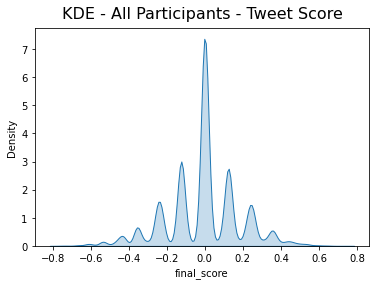

In [159]:
sns.kdeplot(all_tweets['final_score'], fill=True)
plt.title("KDE - All Participants - Tweet Score", fontsize=16, pad=10)

Text(0.5, 1.0, 'Histogram - All Participants - Tweet Score')

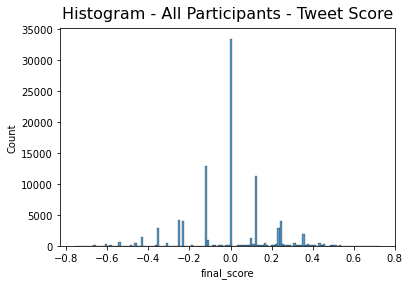

In [158]:
sns.histplot(all_tweets['final_score'])
plt.title("Histogram - All Participants - Tweet Score", fontsize=16, pad=10)

Text(0.5, 1.0, 'QQPlot - All Participants - Tweet Score')

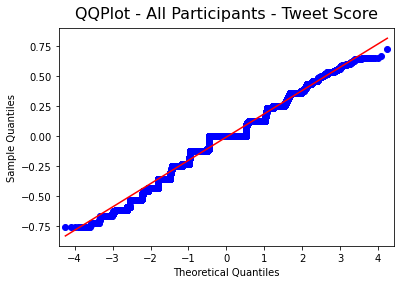

In [157]:
fig = qqplot(all_tweets['final_score'], line='s')
plt.title("QQPlot - All Participants - Tweet Score", fontsize=16, pad=10)

In [54]:
# normality test
stat, p = shapiro(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
# normality test
stat, p = normaltest(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=114.643, p=0.000
Sample does not look Gaussian (reject H0)


In [56]:
# normality test
result = anderson(all_tweets['final_score'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 252.049
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [57]:
statistic,pvalue = chisquare(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=128546.630, p=0.000
Probably not Gaussian


In [58]:
statistic,pvalue = kstest(all_tweets['final_score'], 'norm')
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=0.318, p=0.000
Probably not Gaussian


In [59]:
statistic,pvalue = jarque_bera(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=133.398, p=0.000
Probably not Gaussian


In [60]:
indices = range(1,13)
for i in indices: 
    statistic,pvalue = jarque_bera(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
    if pvalue > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Statistics=11.853, p=0.003
Probably not Gaussian
Statistics=64.864, p=0.000
Probably not Gaussian
Statistics=6.402, p=0.041
Probably not Gaussian
Statistics=6.312, p=0.043
Probably not Gaussian
Statistics=1.794, p=0.408
Probably Gaussian
Statistics=19.400, p=0.000
Probably not Gaussian
Statistics=0.645, p=0.724
Probably Gaussian
Statistics=50.489, p=0.000
Probably not Gaussian
Statistics=92.167, p=0.000
Probably not Gaussian
Statistics=14.664, p=0.001
Probably not Gaussian
Statistics=2.168, p=0.338
Probably Gaussian
Statistics=130.149, p=0.000
Probably not Gaussian


In [61]:
indices = range(1,13)
for i in indices: 
    statistic,pvalue = kstest(all_tweets.query("Participant == {}".format(i))['final_score'], 'norm')
    print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
    if pvalue > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Statistics=0.317, p=0.000
Probably not Gaussian
Statistics=0.338, p=0.000
Probably not Gaussian
Statistics=0.299, p=0.000
Probably not Gaussian
Statistics=0.351, p=0.000
Probably not Gaussian
Statistics=0.332, p=0.000
Probably not Gaussian
Statistics=0.331, p=0.000
Probably not Gaussian
Statistics=0.339, p=0.000
Probably not Gaussian
Statistics=0.333, p=0.000
Probably not Gaussian
Statistics=0.353, p=0.000
Probably not Gaussian
Statistics=0.302, p=0.000
Probably not Gaussian
Statistics=0.333, p=0.000
Probably not Gaussian
Statistics=0.345, p=0.000
Probably not Gaussian


In [62]:
indices = range(1,13)
for i in indices: 
    statistic,pvalue = chisquare(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
    if pvalue > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Statistics=-22938.465, p=1.000
Probably Gaussian
Statistics=12767.448, p=0.000
Probably not Gaussian
Statistics=32212.353, p=0.000
Probably not Gaussian
Statistics=1378.231, p=1.000
Probably Gaussian
Statistics=5333.302, p=1.000
Probably Gaussian
Statistics=6121.780, p=1.000
Probably Gaussian
Statistics=1002.745, p=1.000
Probably Gaussian
Statistics=3195.713, p=0.000
Probably not Gaussian
Statistics=2588.296, p=1.000
Probably Gaussian
Statistics=17152.885, p=0.000
Probably not Gaussian
Statistics=2455.624, p=1.000
Probably Gaussian
Statistics=-32182.978, p=1.000
Probably Gaussian


In [63]:
# normality test
indices = range(1,13)
for i in indices: 
    result = anderson(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 19.077
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistic: 23.562
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistic: 11.171
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistic: 6.621
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look norm

In [64]:
indices = range(1,13)
for i in indices: 
    # normality test
    stat, p = shapiro(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.989, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)


In [65]:
indices = range(1,13)
for i in indices: 
    print(pg.normality(all_tweets.query("Participant == {}".format(i))['final_score']))

                    W          pval  normal
final_score  0.992997  4.904860e-15   False
                    W          pval  normal
final_score  0.989396  5.461497e-18   False
                    W          pval  normal
final_score  0.995799  4.703535e-12   False
                    W          pval  normal
final_score  0.994622  2.172063e-09   False
                    W          pval  normal
final_score  0.996685  2.549908e-10   False
                    W          pval  normal
final_score  0.996936  4.802613e-13   False
                    W      pval  normal
final_score  0.995589  0.000174   False
                    W          pval  normal
final_score  0.982345  1.934308e-17   False
                    W          pval  normal
final_score  0.992803  1.413019e-17   False
                    W          pval  normal
final_score  0.997314  2.121524e-07   False
                    W          pval  normal
final_score  0.995186  4.228411e-10   False
                    W          pval  nor

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
